In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
xgb=xgb.XGBRegressor()
from sklearn.metrics import r2_score
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('train 2.csv',parse_dates=['date'])
df

date  store  item  sales
0      2013-01-01      1     1     13
1      2013-01-02      1     1     11
2      2013-01-03      1     1     14
3      2013-01-04      1     1     13
4      2013-01-05      1     1     10
...           ...    ...   ...    ...
912995 2017-12-27     10    50     63
912996 2017-12-28     10    50     59
912997 2017-12-29     10    50     74
912998 2017-12-30     10    50     62
912999 2017-12-31     10    50     82

[913000 rows x 4 columns]

In [3]:
print('Number of stores:',df['store'].nunique())
print('Number of items:',df['item'].nunique())

Number of stores: 10
Number of items: 50


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   store   913000 non-null  int64         
 2   item    913000 non-null  int64         
 3   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 27.9 MB


In [5]:
df.drop('store',axis=1,inplace=True)#dropping store col as as our problem statement focused on item demand but not on stores.

In [6]:
d1=df.groupby(['item','date'])['sales'].sum()#Grouping data based on item and date to get total sales of item on each day.

In [7]:
type(d1)

pandas.core.series.Series

In [8]:
d2=d1.to_frame()#changing to dataframe

In [9]:
type(d2)

pandas.core.frame.DataFrame

In [10]:
d2

sales
item date             
1    2013-01-01    133
     2013-01-02     99
     2013-01-03    127
     2013-01-04    145
     2013-01-05    149
...                ...
50   2017-12-27    511
     2017-12-28    587
     2017-12-29    596
     2017-12-30    612
     2017-12-31    626

[91300 rows x 1 columns]

In [11]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 91300 entries, (1, Timestamp('2013-01-01 00:00:00')) to (50, Timestamp('2017-12-31 00:00:00'))
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   sales   91300 non-null  int64
dtypes: int64(1)
memory usage: 995.5 KB


In [12]:
d2.reset_index(inplace=True)
d2.set_index('date',inplace=True)#making only date as index

In [13]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 91300 entries, 2013-01-01 to 2017-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   item    91300 non-null  int64
 1   sales   91300 non-null  int64
dtypes: int64(2)
memory usage: 2.1 MB


<AxesSubplot:xlabel='date'>

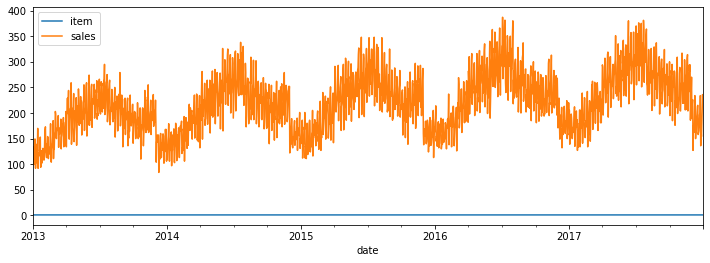

In [14]:
d2[d2['item']==1].plot(figsize=(12,4))#plotting item1 sales

### Let us plot 90day sales data of all the items

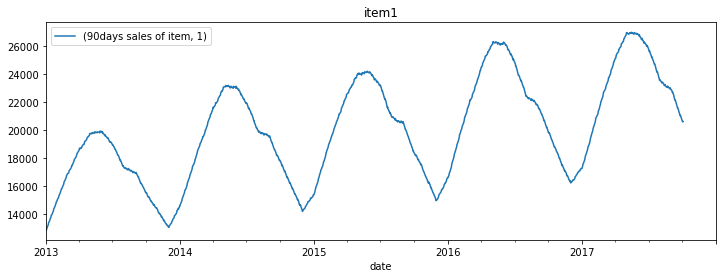

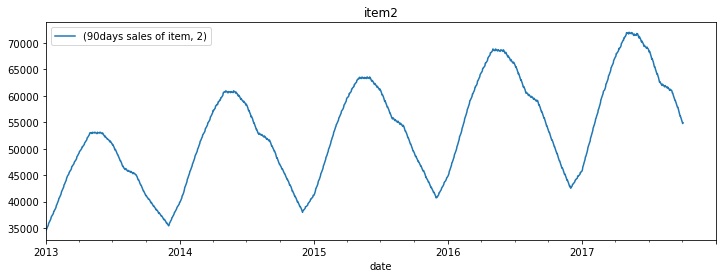

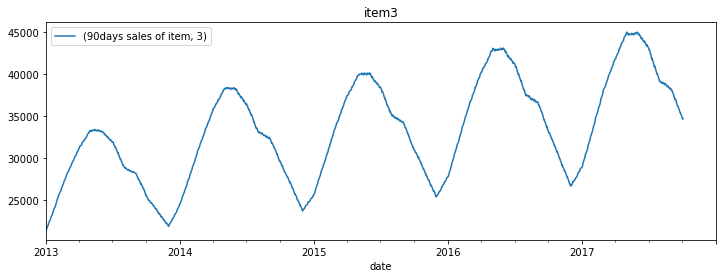

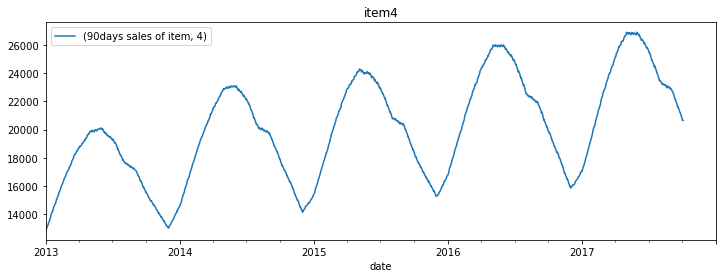

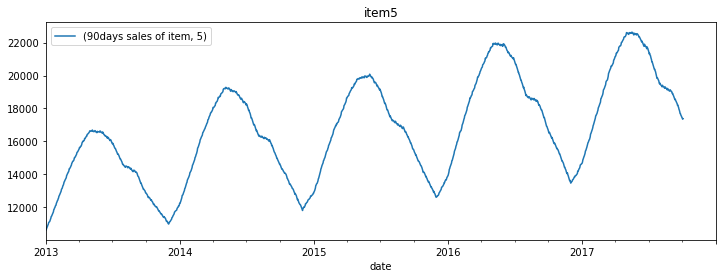

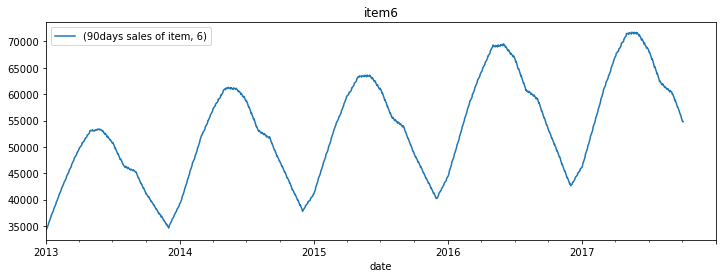

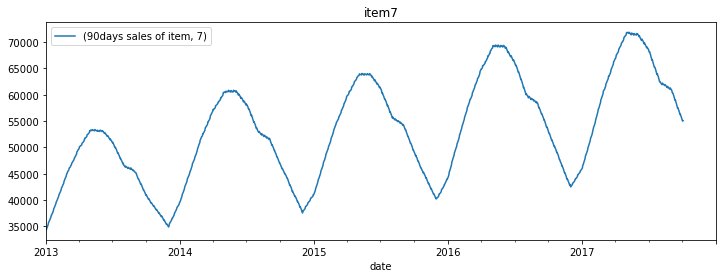

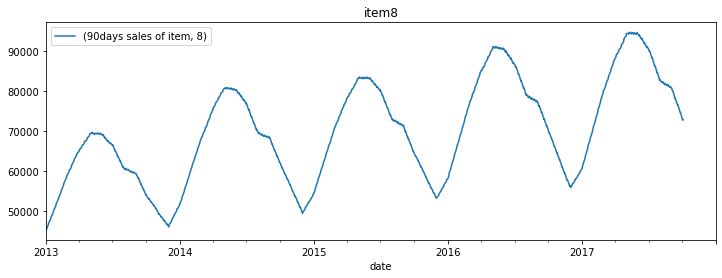

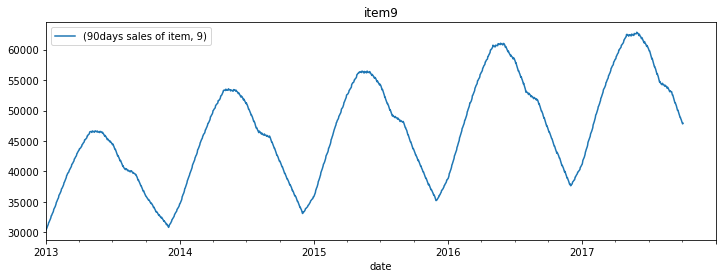

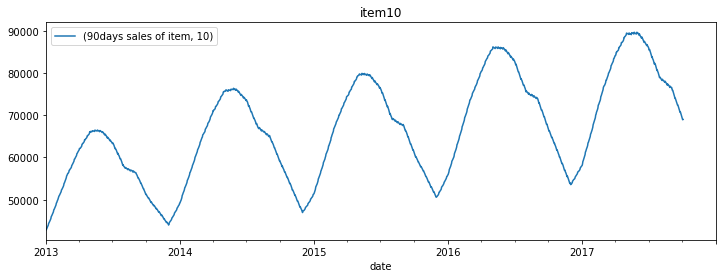

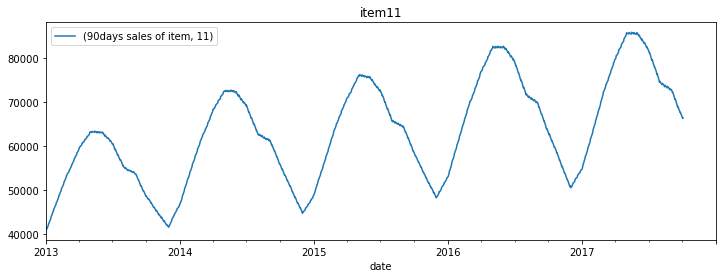

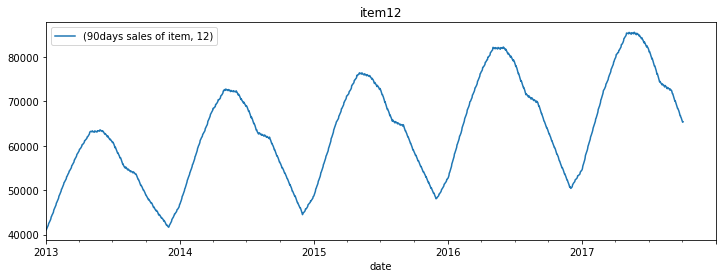

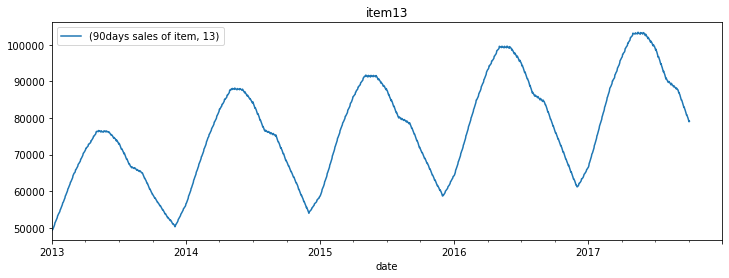

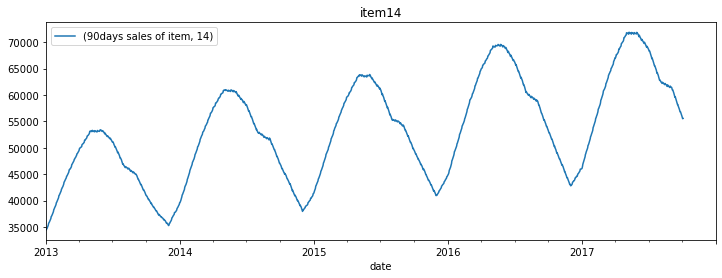

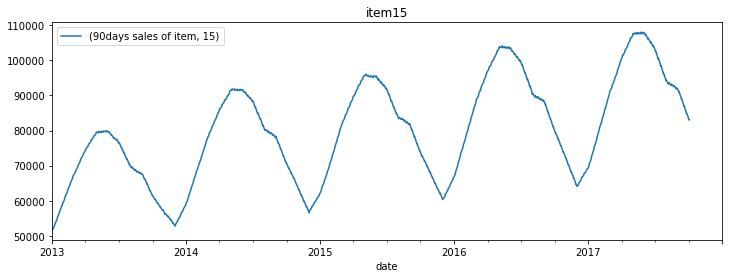

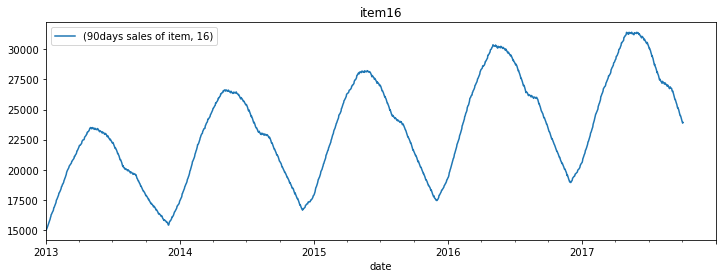

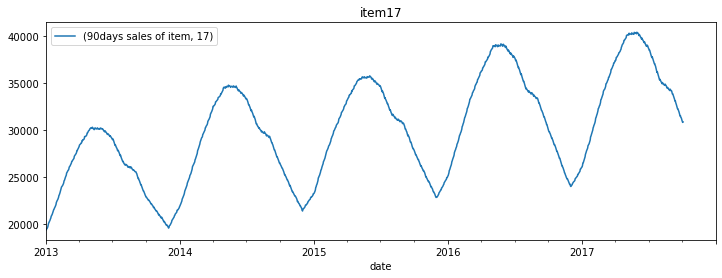

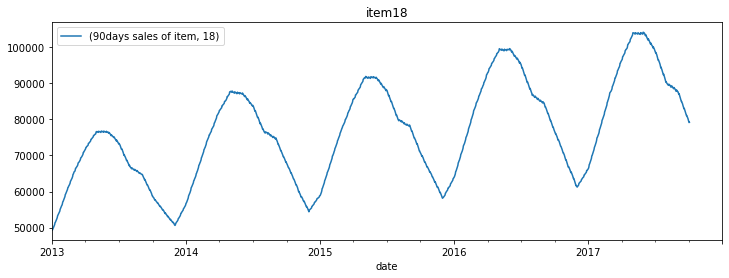

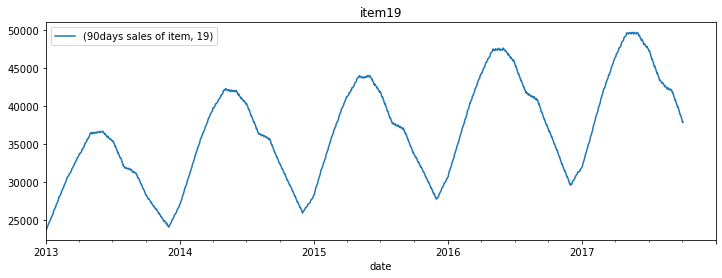

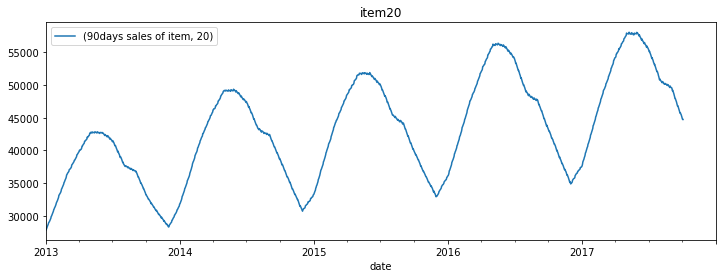

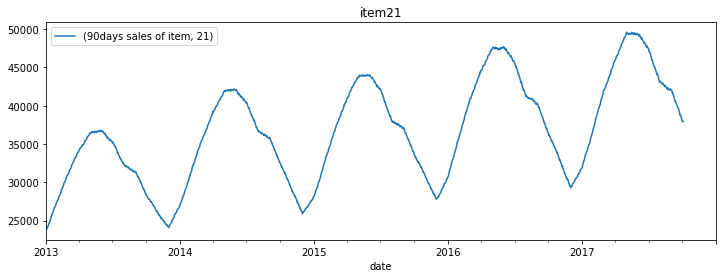

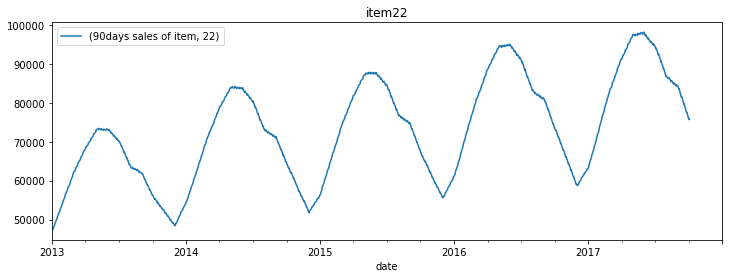

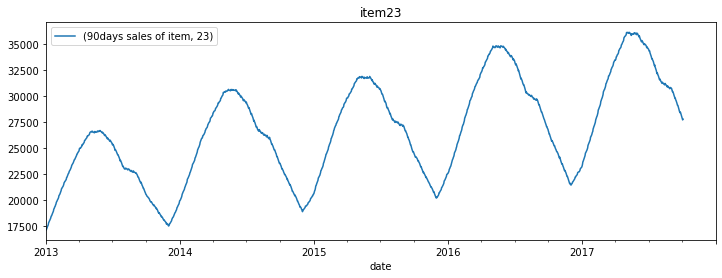

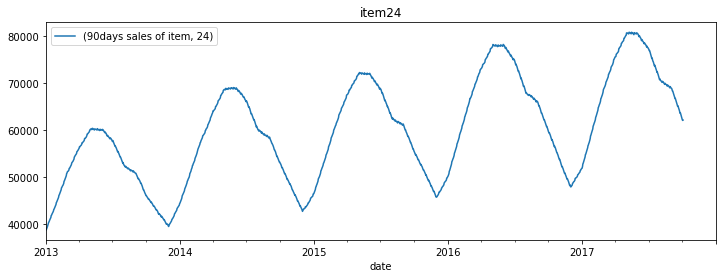

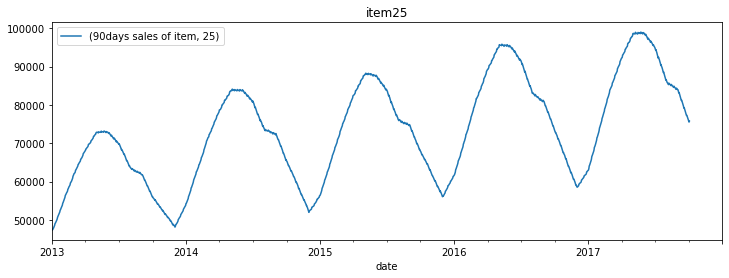

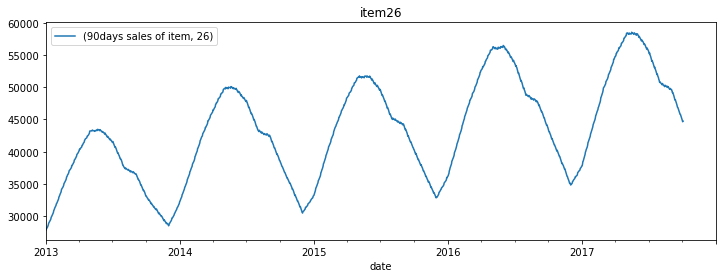

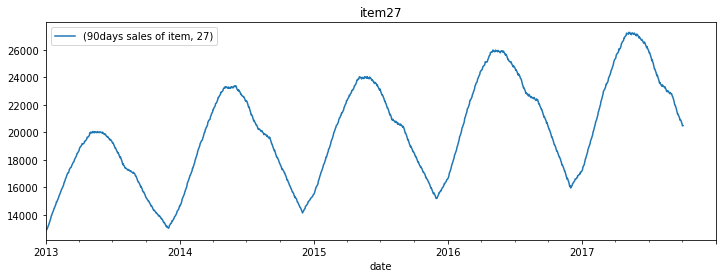

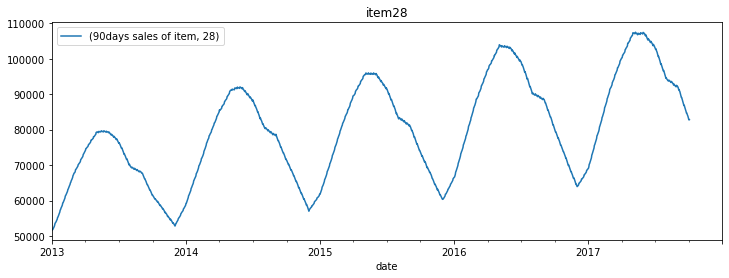

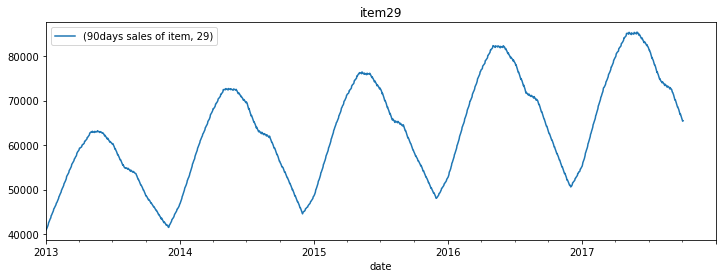

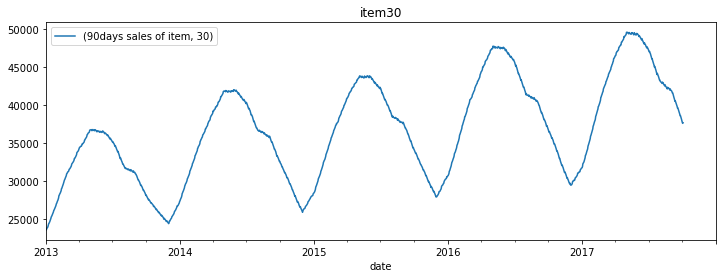

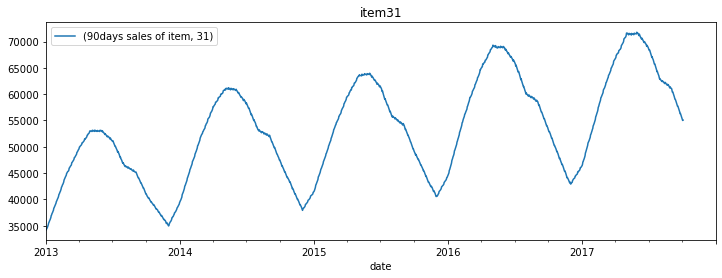

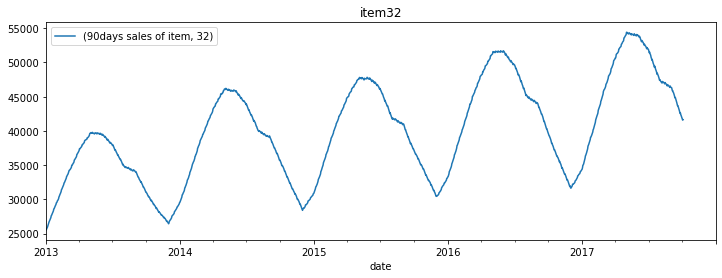

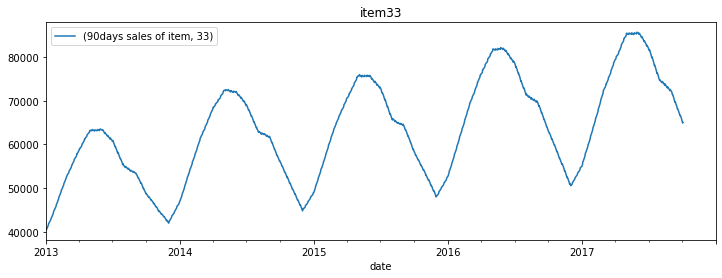

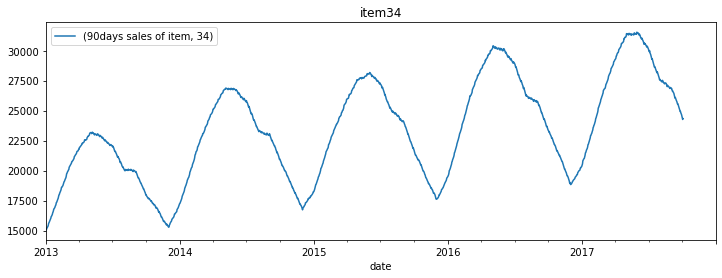

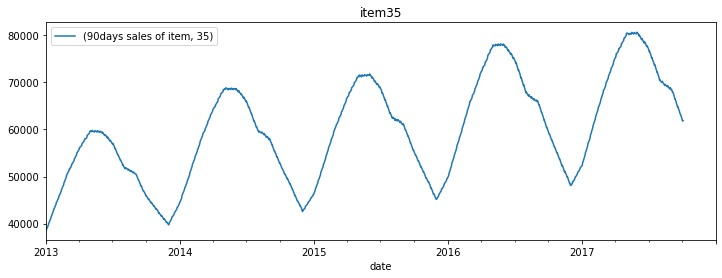

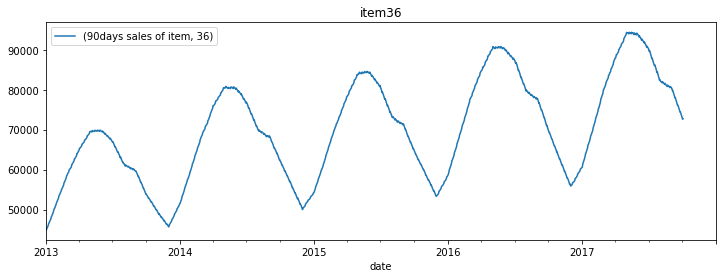

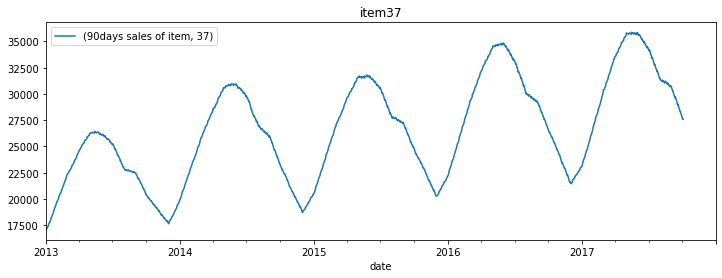

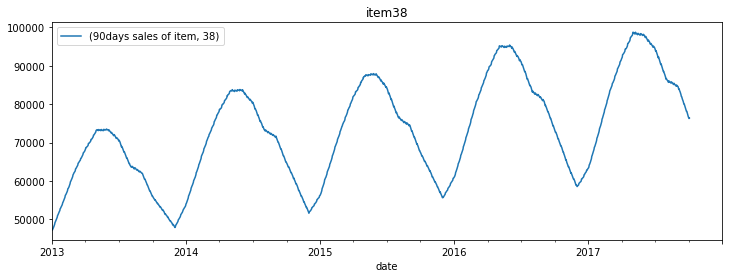

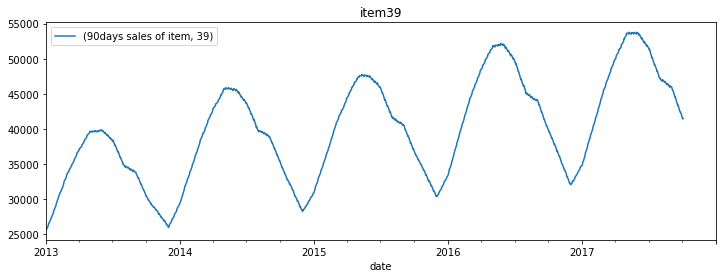

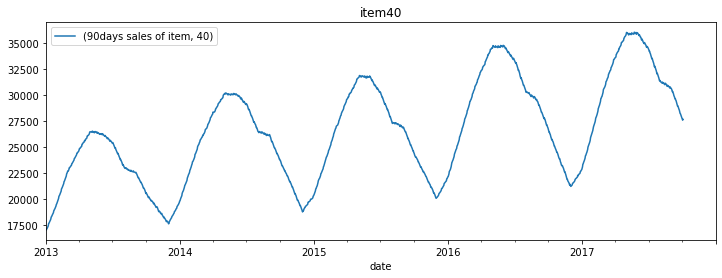

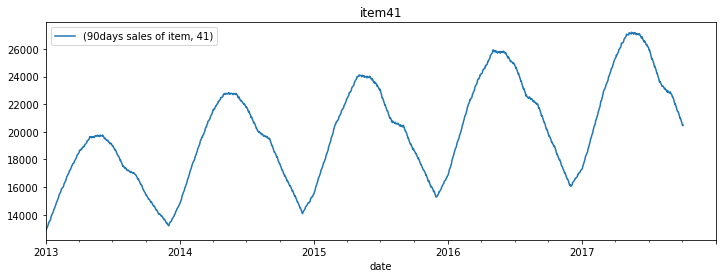

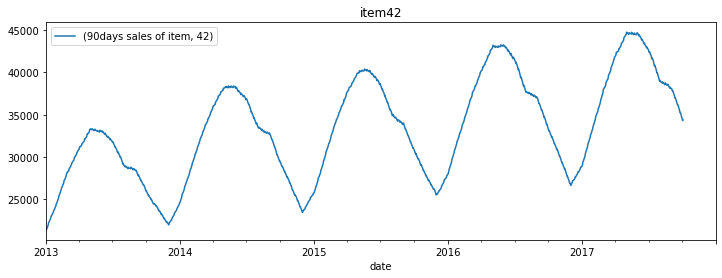

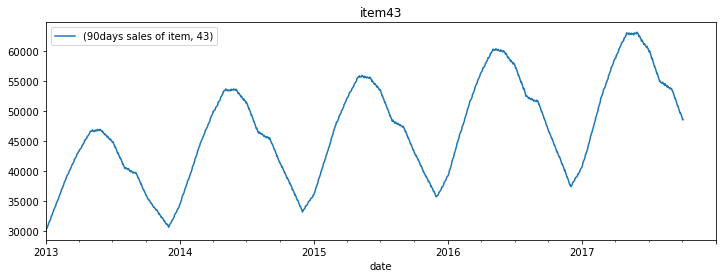

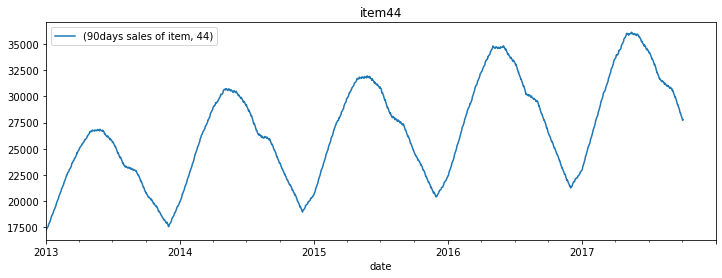

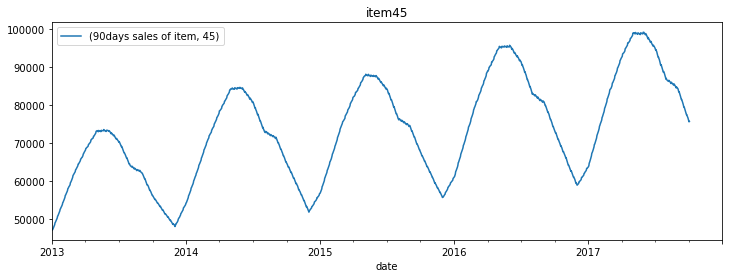

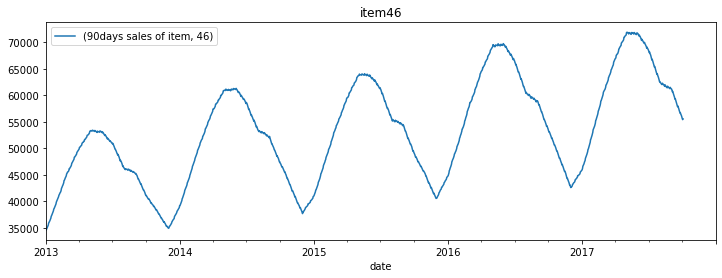

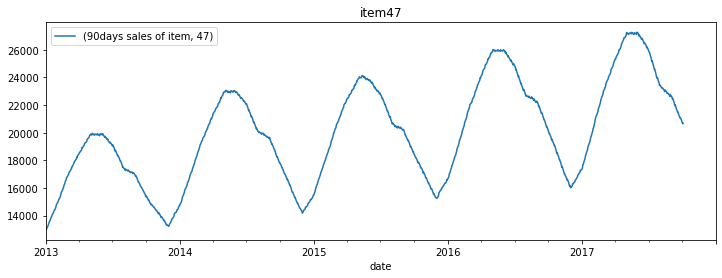

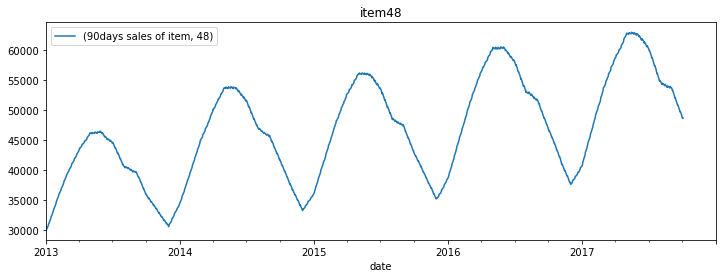

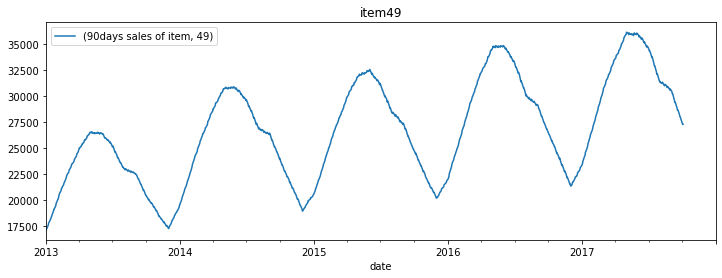

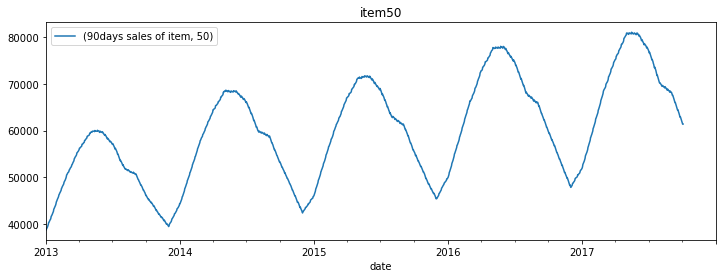

In [15]:
for i in range(1,51):
    item=d2[d2['item']==i]
    item['90days sales of item',i]=item['sales'].rolling(90).sum().shift(-89)
    item.drop(['item','sales'],axis=1,inplace=True)
    item.plot(figsize=(12,4),title='item'+str(i))

### First let us look into item1 sales data

In [16]:
df_item1=d2[d2['item']==1]
df_item1['90day_sales']=df_item1['sales'].rolling(90).sum()
df_item1=df_item1.shift(-89)
df_item1=df_item1.iloc[::7]
df_item1.drop(['item','sales'],axis=1,inplace=True)
df_item1# it gives information about next 90days sales data of item1.

90day_sales
date                   
2013-01-01      12847.0
2013-01-08      13375.0
2013-01-15      13891.0
2013-01-22      14356.0
2013-01-29      14866.0
...                 ...
2017-11-28          NaN
2017-12-05          NaN
2017-12-12          NaN
2017-12-19          NaN
2017-12-26          NaN

[261 rows x 1 columns]

<AxesSubplot:xlabel='date'>

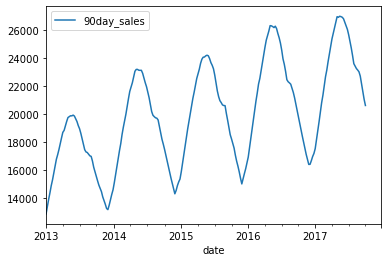

In [17]:
df_item1.plot()

In [18]:
df_item1.reset_index(inplace=True)

In [19]:
df_item1['day']=df_item1['date'].dt.day
df_item1['week']=df_item1['date'].dt.week
df_item1['year']=df_item1['date'].dt.year #taking day,week,year as features to predict the sales

In [20]:
df_item1.dropna(inplace=True)

In [21]:
df_item1.set_index('date',inplace=True)

In [22]:
X_train=df_item1.drop(['90day_sales'],axis=1).iloc[:200]
X_test=df_item1.drop(['90day_sales'],axis=1).iloc[200:]

Y_train=df_item1['90day_sales'].iloc[:200]
Y_test=df_item1['90day_sales'].iloc[200:]#making train and test datasets

In [23]:
X_test

day  week  year
date                       
2016-11-01    1    44  2016
2016-11-08    8    45  2016
2016-11-15   15    46  2016
2016-11-22   22    47  2016
2016-11-29   29    48  2016
2016-12-06    6    49  2016
2016-12-13   13    50  2016
2016-12-20   20    51  2016
2016-12-27   27    52  2016
2017-01-03    3     1  2017
2017-01-10   10     2  2017
2017-01-17   17     3  2017
2017-01-24   24     4  2017
2017-01-31   31     5  2017
2017-02-07    7     6  2017
2017-02-14   14     7  2017
2017-02-21   21     8  2017
2017-02-28   28     9  2017
2017-03-07    7    10  2017
2017-03-14   14    11  2017
2017-03-21   21    12  2017
2017-03-28   28    13  2017
2017-04-04    4    14  2017
2017-04-11   11    15  2017
2017-04-18   18    16  2017
2017-04-25   25    17  2017
2017-05-02    2    18  2017
2017-05-09    9    19  2017
2017-05-16   16    20  2017
2017-05-23   23    21  2017
2017-05-30   30    22  2017
2017-06-06    6    23  2017
2017-06-13   13    24  2017
2017-06-20   20    25  2017
2017-06-27   27    26  2017
2017-07-04    4    27  2017
2017-07-11   11    28  2017
2017-07-18   18    29  2017
2017-07-25   25    30  2017
2017-08-01    1    31  2017
2017-08-08    8    32  2017
2017-08-15   15    33  2017
2017-08-22   22    34  2017
2017-08-29   29    35  2017
2017-09-05    5    36  2017
2017-09-12   12    37  2017
2017-09-19   19    38  2017
2017-09-26   26    39  2017
2017-10-03    3    40  2017

### Let us predict and plot using different ML models

In [24]:
def predict_plot(model,title):
    model.fit(X_train,Y_train)
    pred=model.predict(X_test)
    yt=Y_test.to_frame()
    yt['prediction']=pred
    yt.plot(ylabel='sales',title=title)
    print('The r2 score achieved using '+title+' is',r2_score(Y_test,pred))

The r2 score achieved using LinearRegression is 0.15886231040197052
The r2 score achieved using RandomForest is 0.9400092384746773
The r2 score achieved using DecisionTree is 0.9376638590144891
The r2 score achieved using XGBoost is 0.9540473207748267


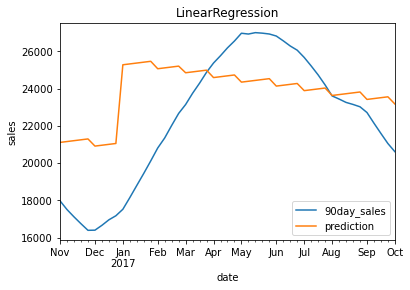

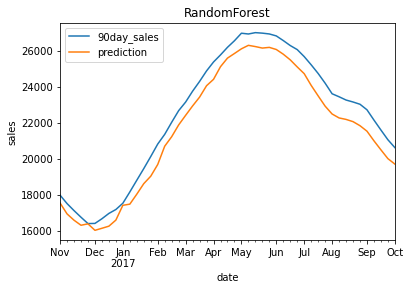

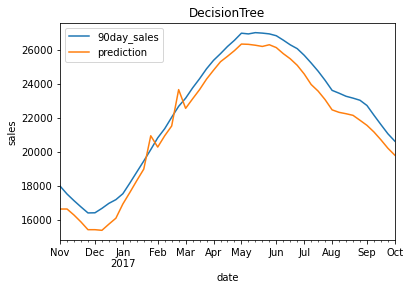

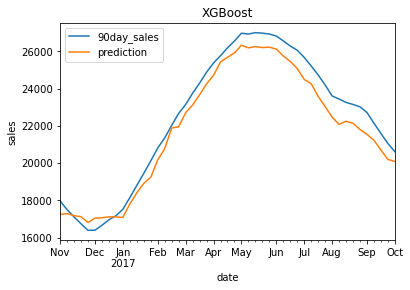

In [25]:
predict_plot(LinearRegression(),'LinearRegression')
predict_plot(RandomForestRegressor(),'RandomForest')
predict_plot(DecisionTreeRegressor(),'DecisionTree')
predict_plot(xgb,'XGBoost')

From the above results XGBoost giving best score so XGBoost can be selected for prediction.

In [26]:
p=[15,46,2016]
p=np.array(p).reshape((1,-1))
print('The predicted next 90day sales are ',xgb.predict(p))#prediction for 15-11-2016 using xgb

The predicted next 90day sales are  [17177.441]


### Let us predict sales and plot them from 01-01-2017 to 31-12-2018

<AxesSubplot:title={'center':'90Day_sales prediction of item1 from 01-01-2017 to 31-12-2018 '}, xlabel='date', ylabel='sales'>

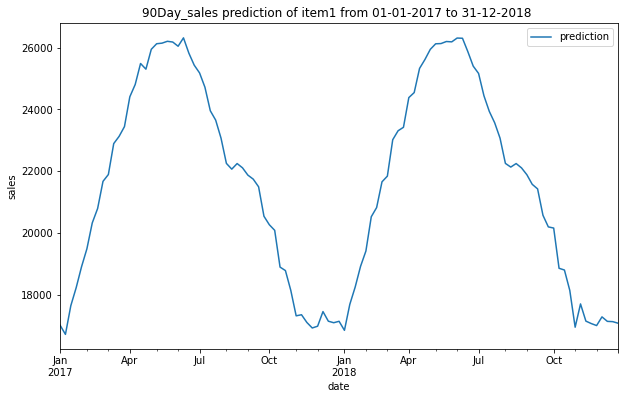

In [27]:
t=str('2017-01-01')#setting start date as 01-01-2017
datelist = pd.date_range(datetime.fromisoformat(t).date(), periods=730).tolist()#setting end date as 31-12-2018
forecast=pd.DataFrame({'date':datelist})#converting datelist to dataframe
forecast['p']=forecast['date'].apply(lambda x:[x.day,x.isocalendar()[1],x.year])#extracting day,week and year features from date
forecast=forecast.iloc[::7]
forecast['r']=forecast['p'].apply(lambda x:np.array(x).reshape((1,-1)))
forecast['prediction']=forecast['r'].apply(lambda x:xgb.predict(x))#prediction done using XGBoost model
forecast.set_index('date',inplace=True)
forecast['prediction']=forecast['prediction'].apply(lambda x:int(x))#making prediction column from object type to int type.
forecast.plot(figsize=(10,6),ylabel='sales',title='90Day_sales prediction of item1 from 01-01-2017 to 31-12-2018 ')

### Let us check the sanity of the model by doing insample test, i.e, train data will be in between 2013-2014 and 2015-2016 and test data will be in between 2014-2015

In [28]:
x1=df_item1.drop(['90day_sales'],axis=1).iloc[:53]#taken data of 2013-2014
x2=df_item1.drop(['90day_sales'],axis=1).iloc[105:157]#taken data of 2015-2016
X_train=pd.concat([x1,x2],axis=0)#merged x1 and x2
X_test=df_item1.drop(['90day_sales'],axis=1).iloc[53:105]#taken data of 2014-2015
y1=df_item1['90day_sales'].iloc[:53]#taken data of 2013-2014
y2=df_item1['90day_sales'].iloc[105:157]#taken data of 2015-2016
Y_train=pd.concat([y1,y2],axis=0)#merged y1 and y2
Y_test=df_item1['90day_sales'].iloc[53:105]#taken data of 2014-2015
print('x_traing data',X_train,sep='\n')
print('x_test data',X_test,sep='\n')

x_traing data
            day  week  year
date                       
2013-01-01    1     1  2013
2013-01-08    8     2  2013
2013-01-15   15     3  2013
2013-01-22   22     4  2013
2013-01-29   29     5  2013
...         ...   ...   ...
2015-12-01    1    49  2015
2015-12-08    8    50  2015
2015-12-15   15    51  2015
2015-12-22   22    52  2015
2015-12-29   29    53  2015

[105 rows x 3 columns]
x_test data
            day  week  year
date                       
2014-01-07    7     2  2014
2014-01-14   14     3  2014
2014-01-21   21     4  2014
2014-01-28   28     5  2014
2014-02-04    4     6  2014
2014-02-11   11     7  2014
2014-02-18   18     8  2014
2014-02-25   25     9  2014
2014-03-04    4    10  2014
2014-03-11   11    11  2014
2014-03-18   18    12  2014
2014-03-25   25    13  2014
2014-04-01    1    14  2014
2014-04-08    8    15  2014
2014-04-15   15    16  2014
2014-04-22   22    17  2014
2014-04-29   29    18  2014
2014-05-06    6    19  2014
2014-05-13   13    20  201

The r2 score achieved using XGBoost is 0.8911663168344449


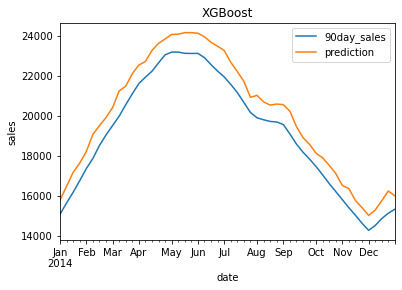

In [29]:
predict_plot(xgb,'XGBoost')

From the above results sanity of the model is verified as insample test giving good results

### Let us find best model for each item prediction and plot them

In [30]:
l=[]
r2=[]
best=[]
models=["LinearRegression","RandomForest","DecisionTree","XGBoost"]

In [31]:
def predict_plot(model,title):
    model.fit(X_train,Y_train)
    pred=model.predict(X_test)
    yt=Y_test.to_frame()
    yt['prediction']=pred
    yt.plot(ylabel='sales',title=title)
    r2.append(r2_score(Y_test,pred))
    l.append(model)
    #print('The r2 score achieved using '+title+' is',r2_score(Y_test,pred))

The best r2_score for item1 achieved using XGBoost and score is 0.9540473207748267
The best r2_score for item2 achieved using DecisionTree and score is 0.9413933967339676
The best r2_score for item3 achieved using XGBoost and score is 0.9311782813928123
The best r2_score for item4 achieved using DecisionTree and score is 0.9508741060628864
The best r2_score for item5 achieved using XGBoost and score is 0.9490764417085646
The best r2_score for item6 achieved using XGBoost and score is 0.9529486312142672
The best r2_score for item7 achieved using XGBoost and score is 0.9478056391359179
The best r2_score for item8 achieved using DecisionTree and score is 0.9331721700684747
The best r2_score for item9 achieved using XGBoost and score is 0.9465679534629465
The best r2_score for item10 achieved using XGBoost and score is 0.9268212323851286
The best r2_score for item11 achieved using DecisionTree and score is 0.9405563430006332
The best r2_score for item12 achieved using DecisionTree and scor

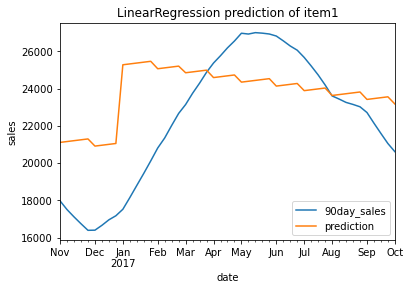

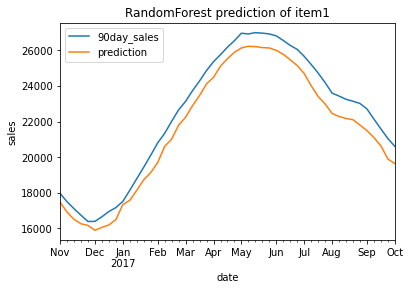

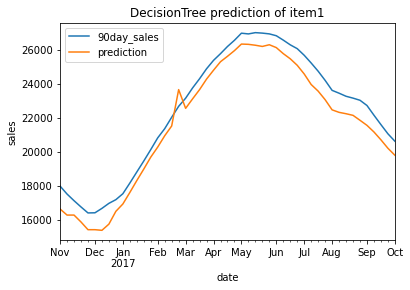

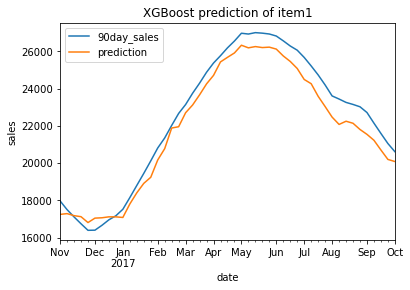

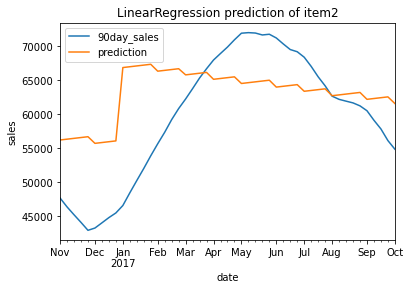

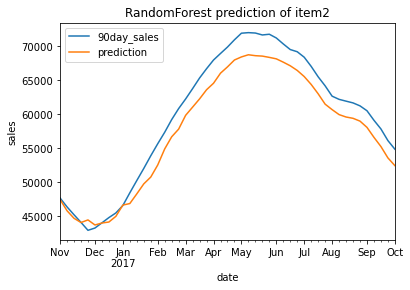

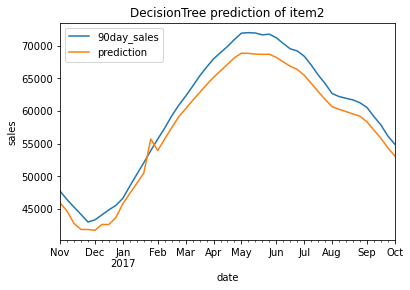

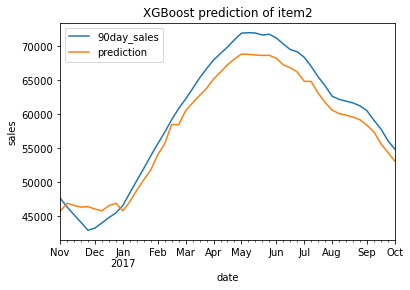

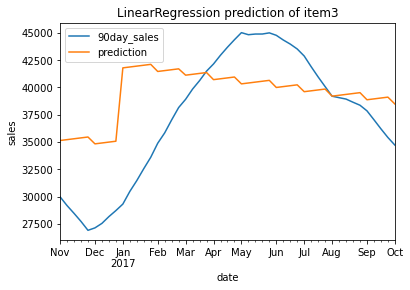

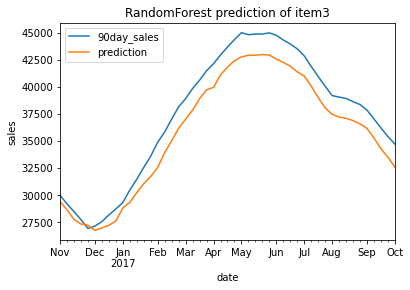

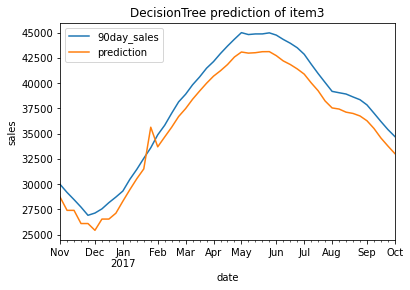

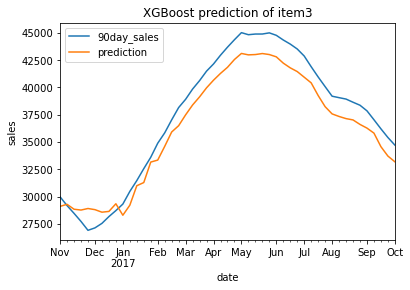

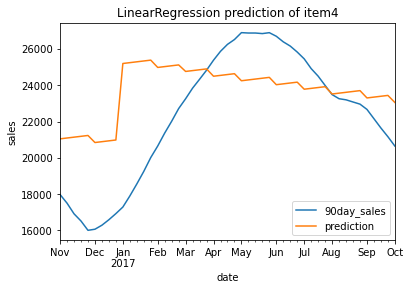

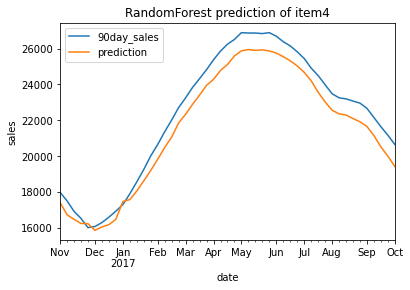

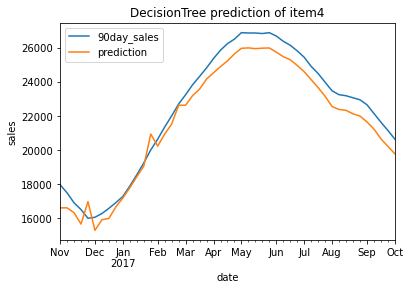

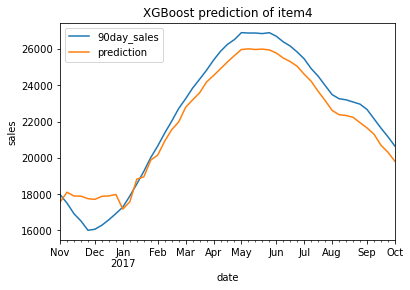

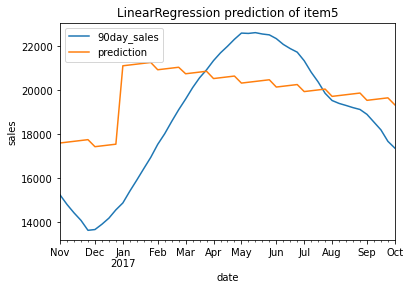

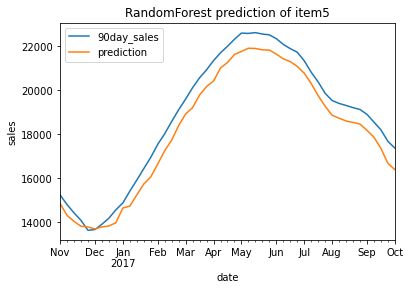

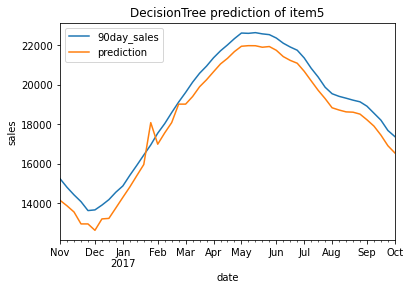

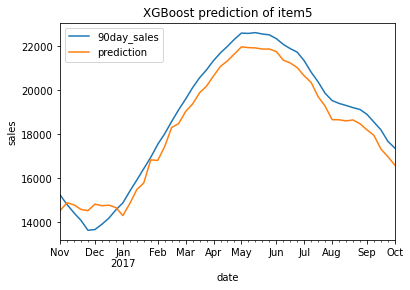

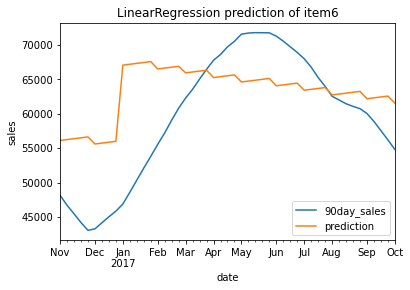

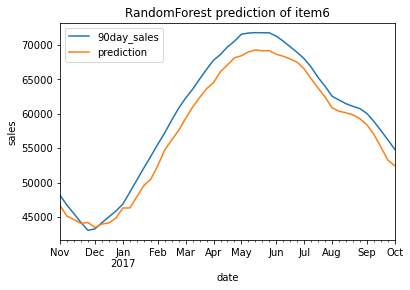

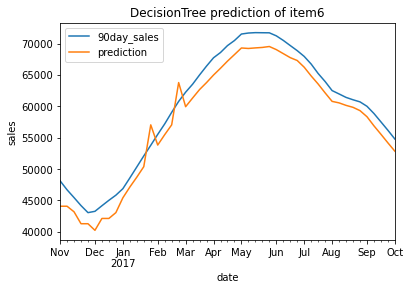

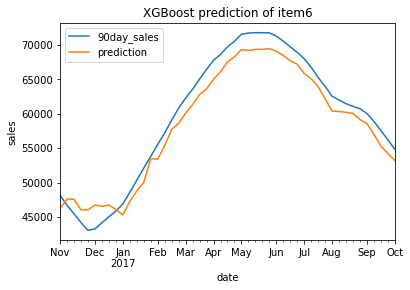

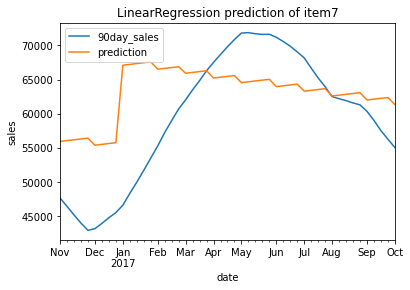

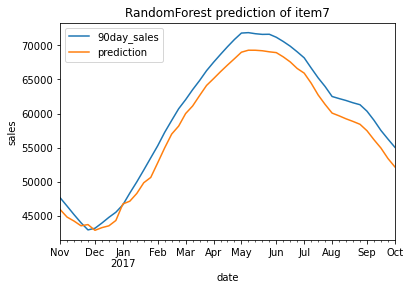

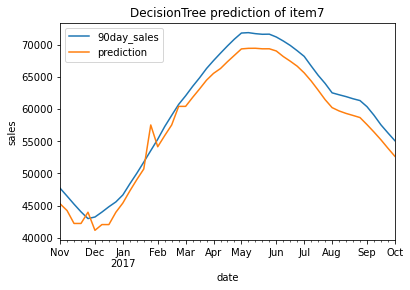

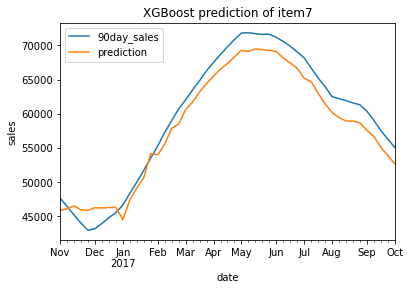

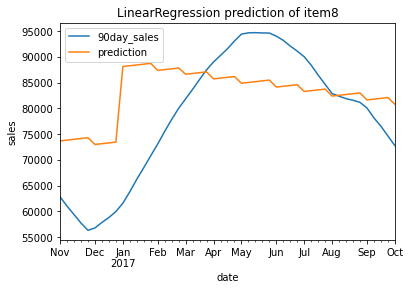

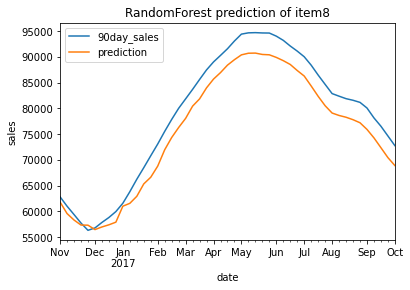

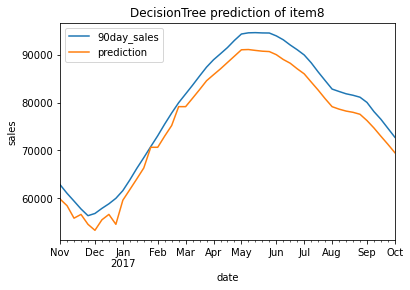

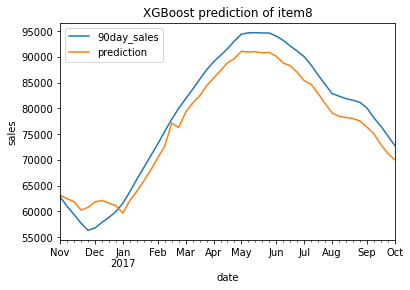

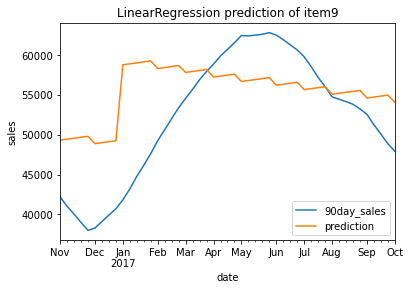

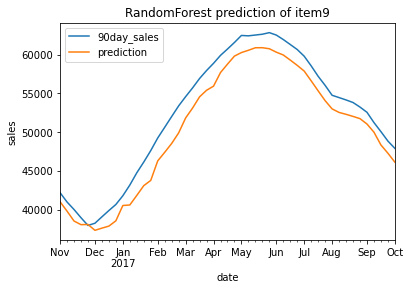

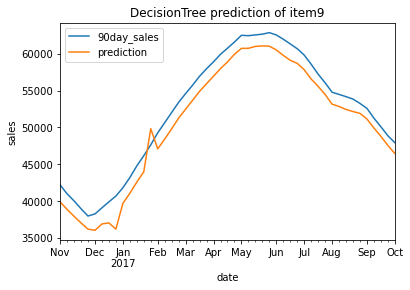

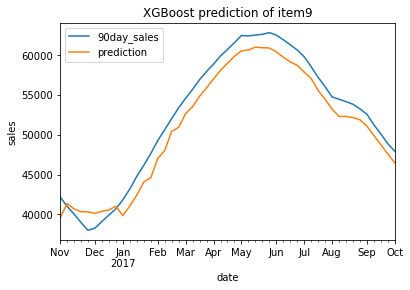

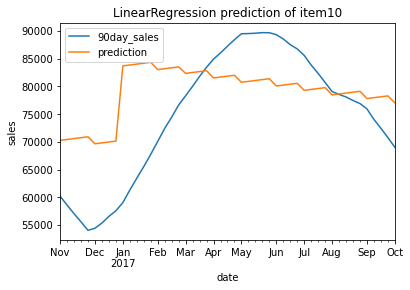

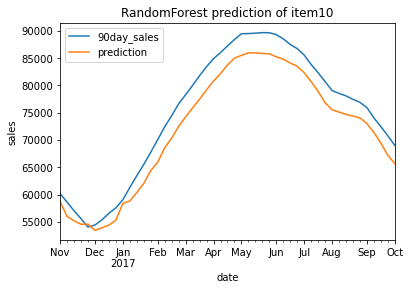

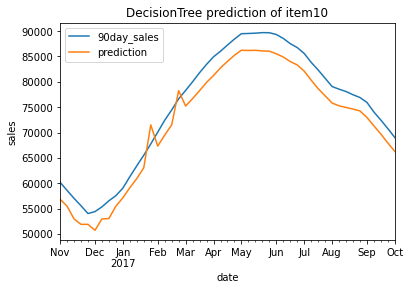

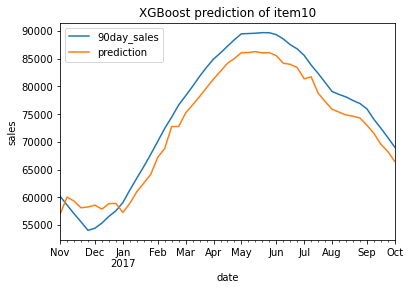

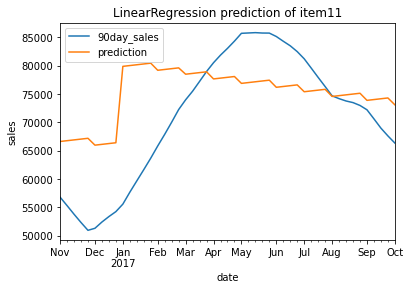

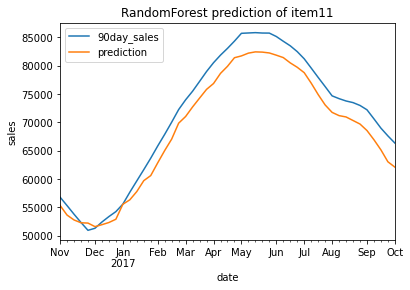

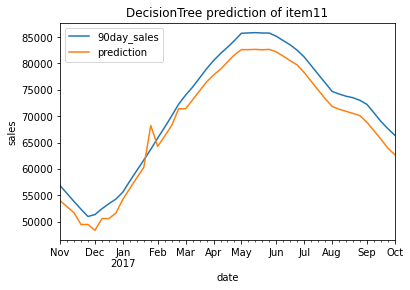

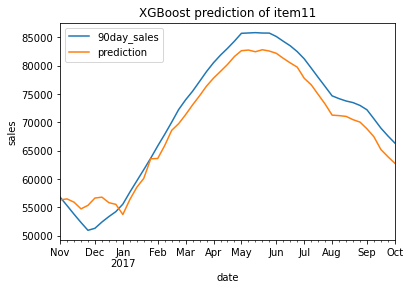

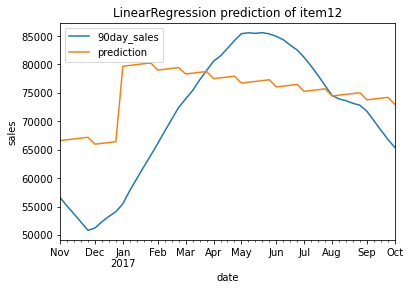

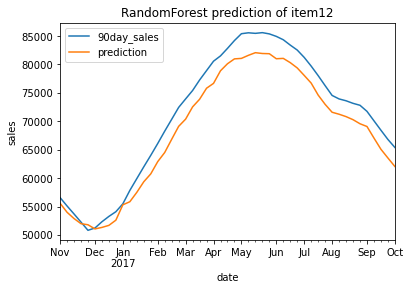

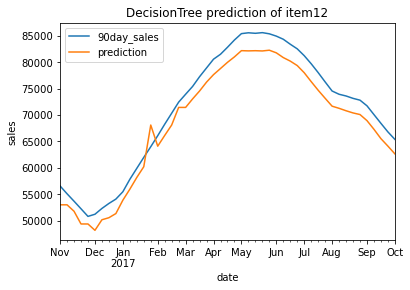

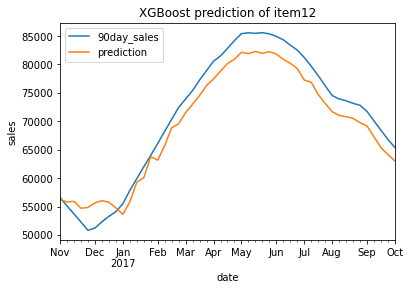

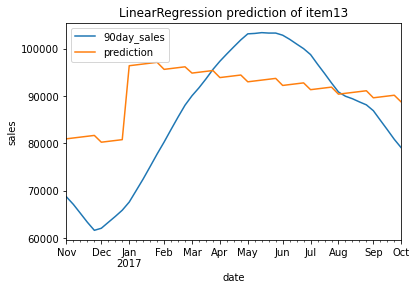

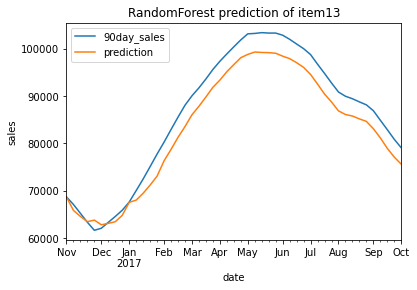

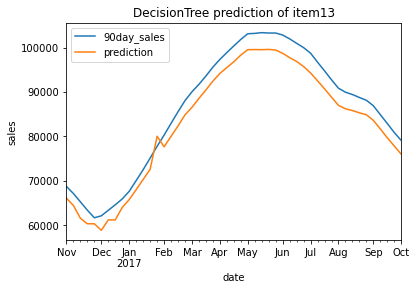

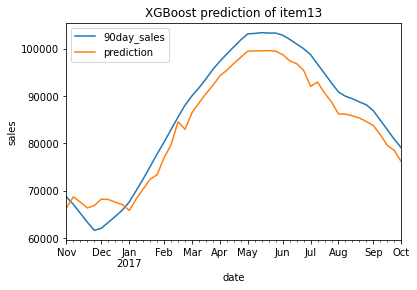

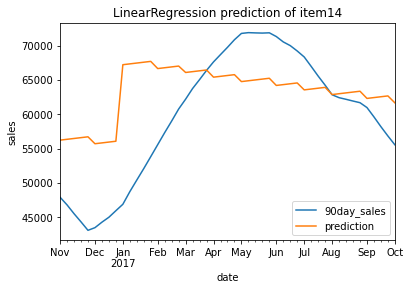

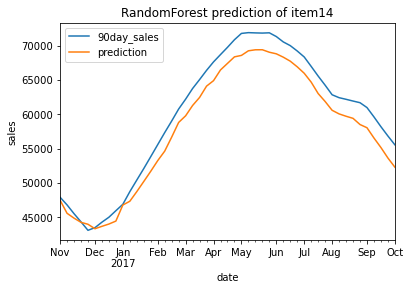

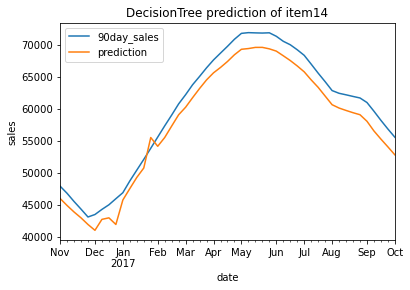

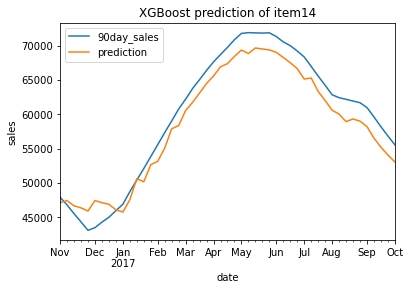

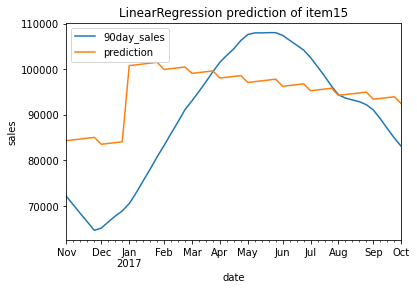

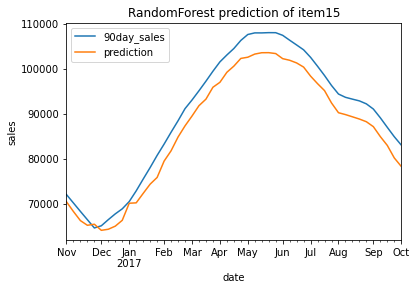

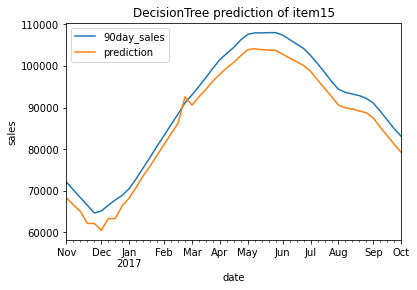

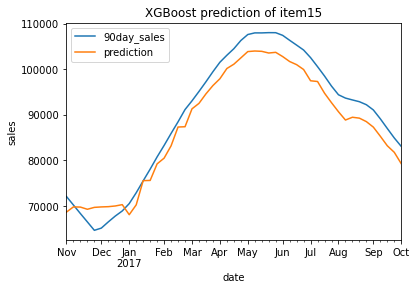

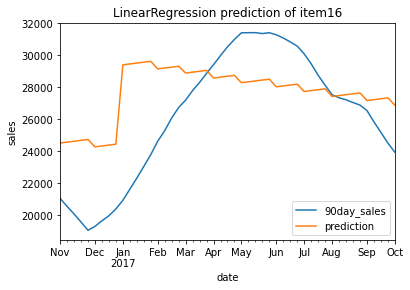

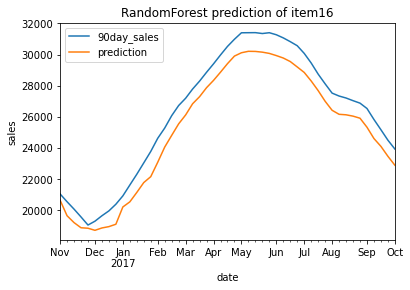

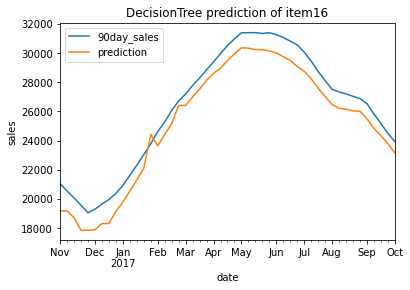

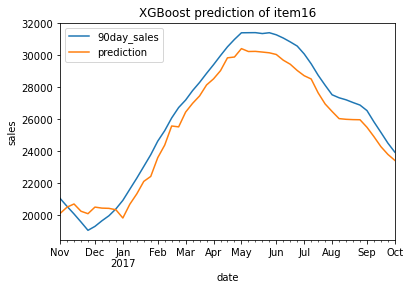

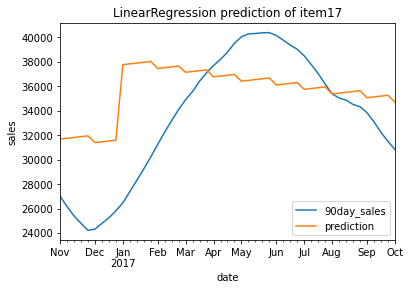

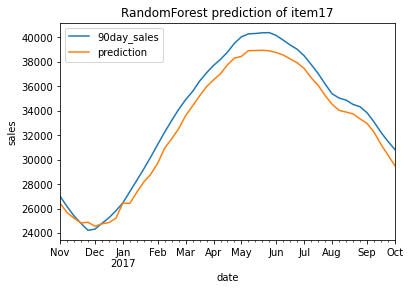

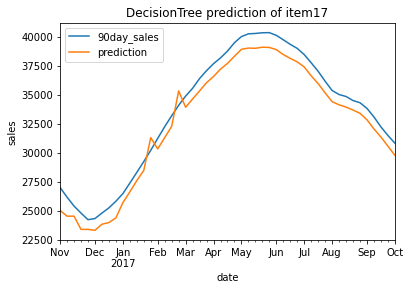

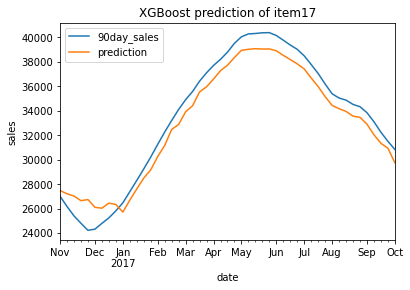

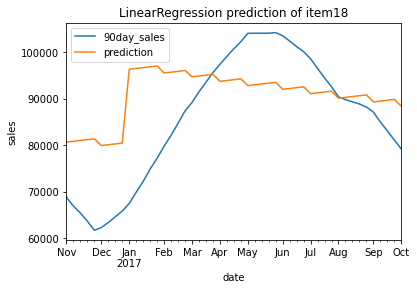

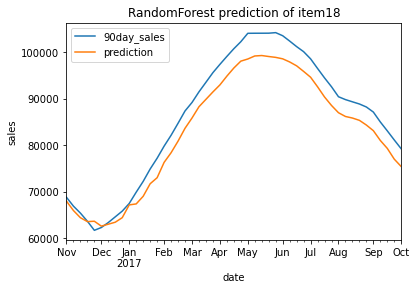

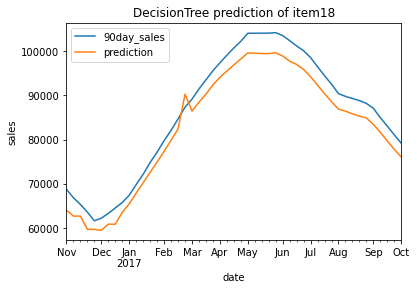

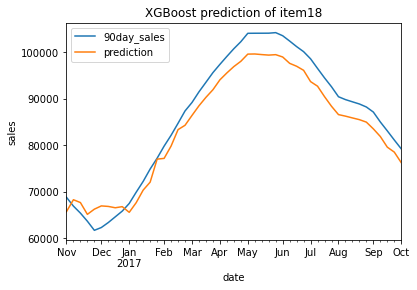

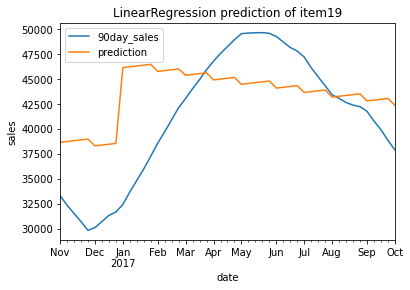

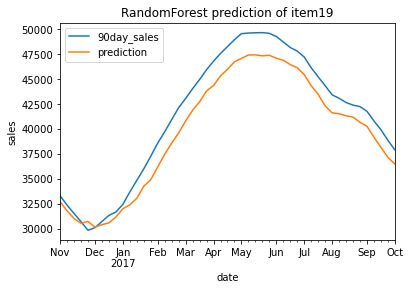

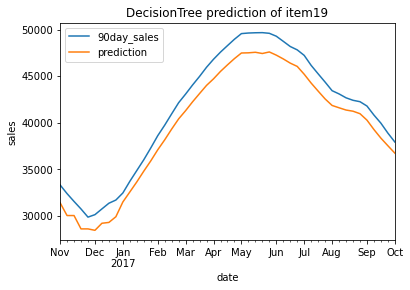

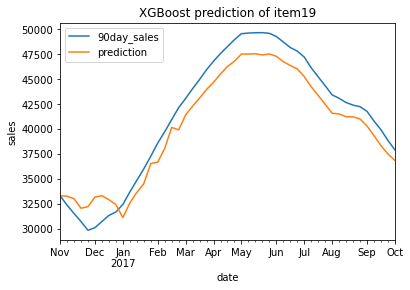

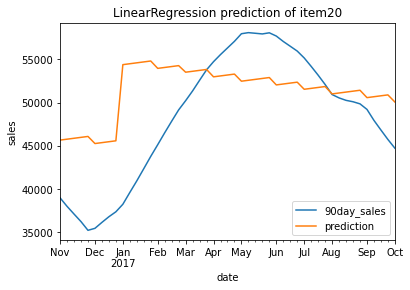

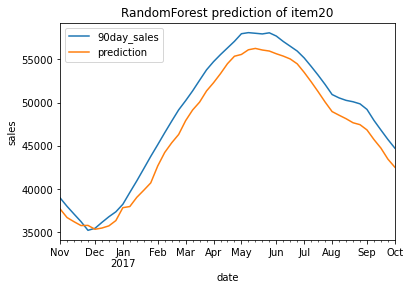

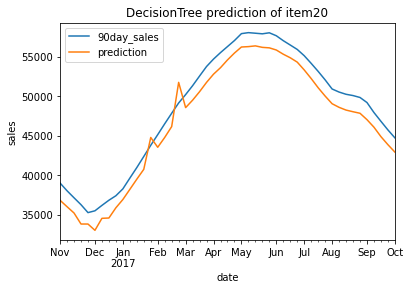

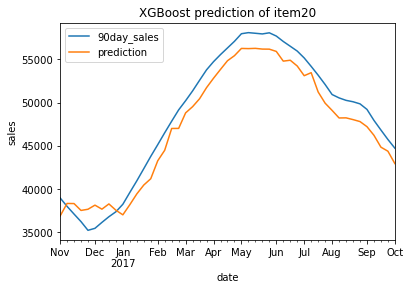

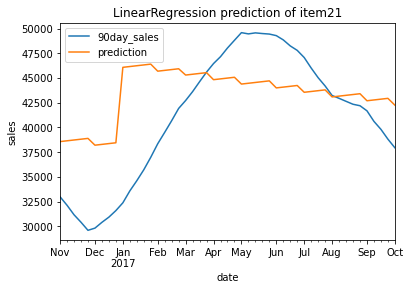

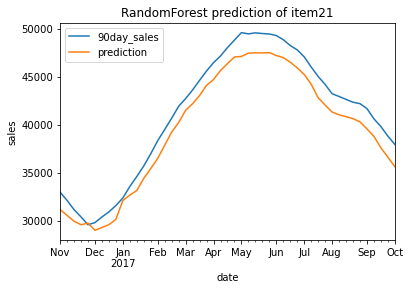

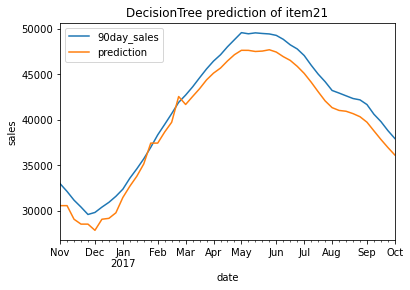

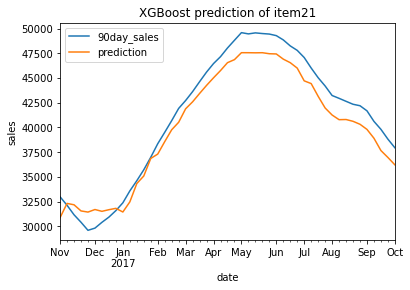

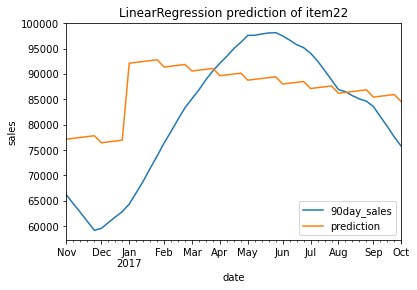

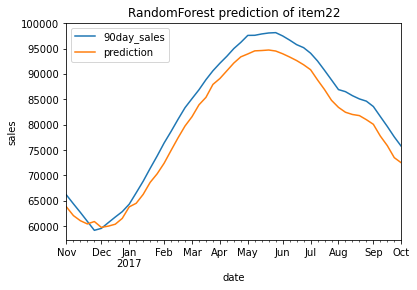

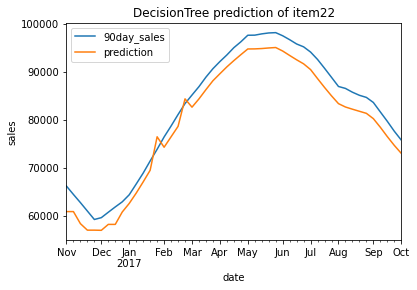

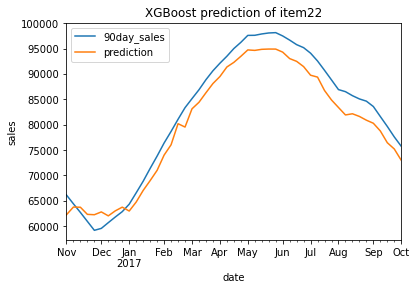

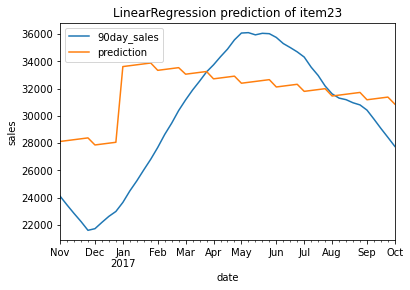

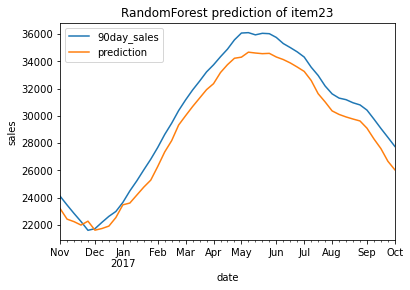

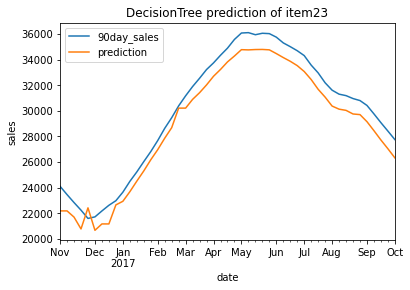

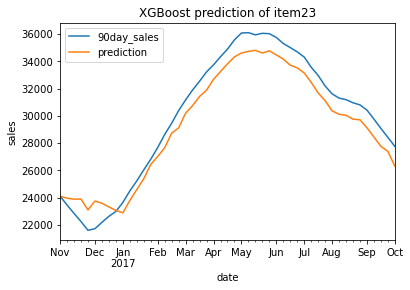

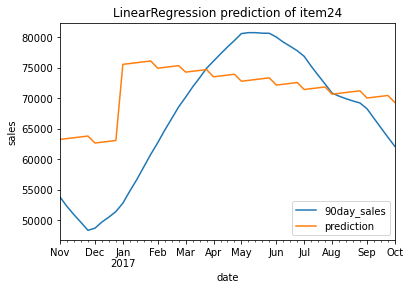

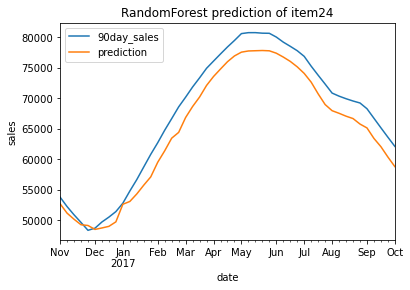

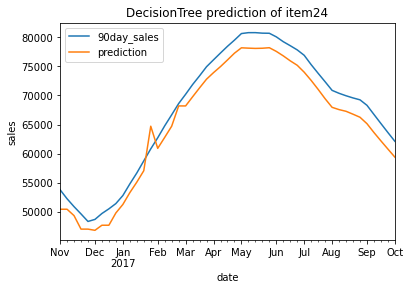

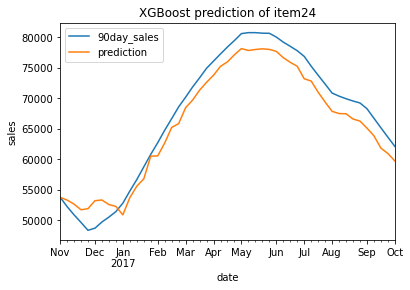

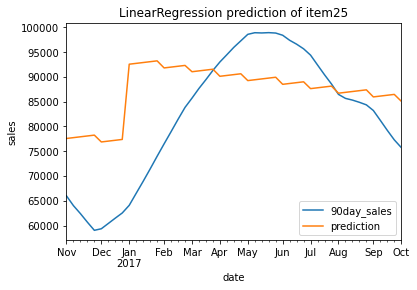

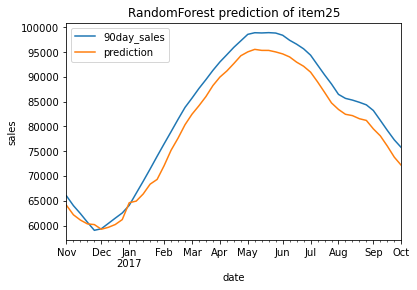

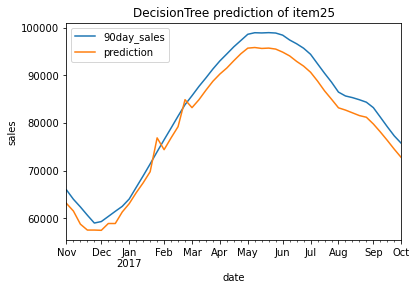

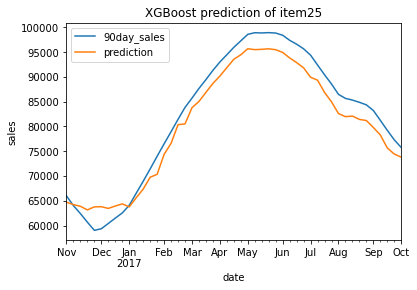

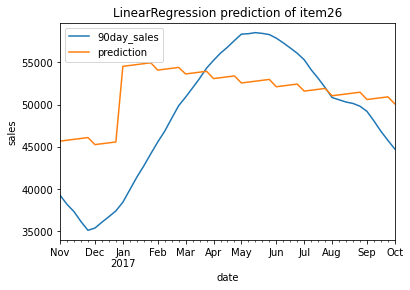

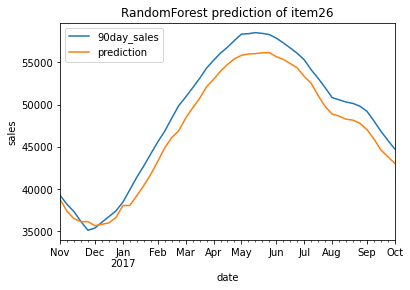

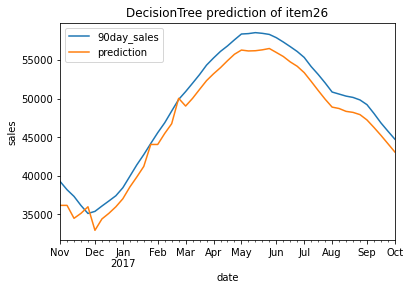

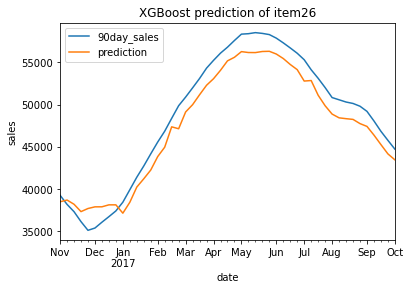

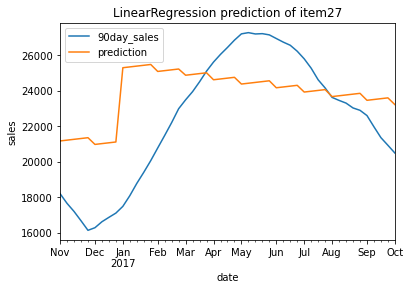

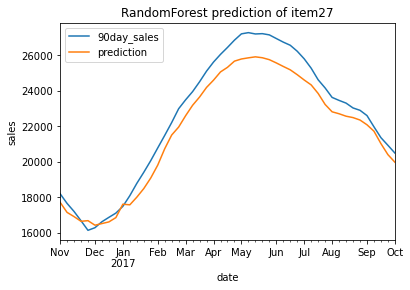

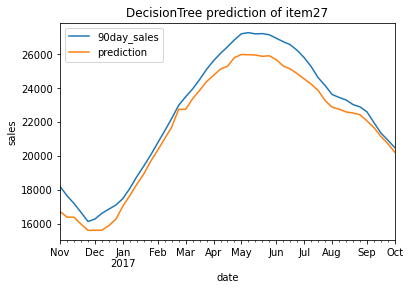

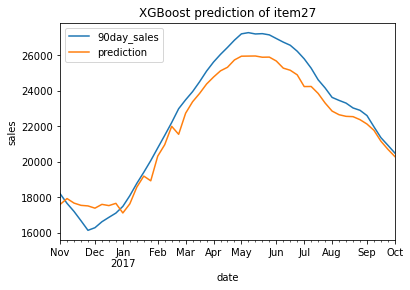

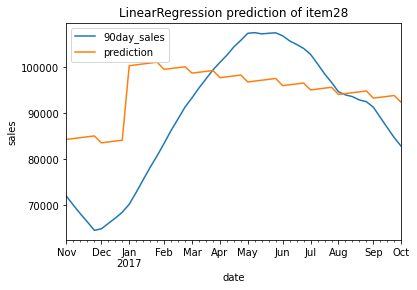

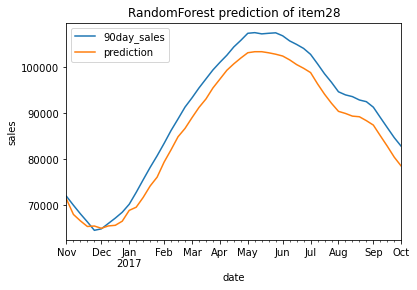

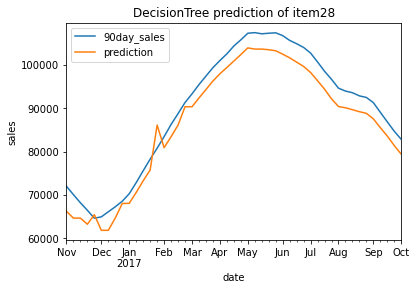

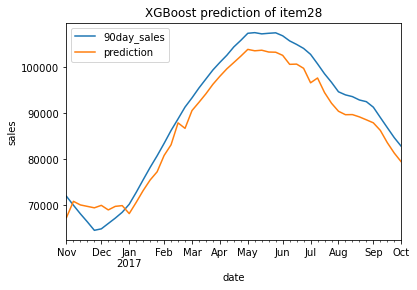

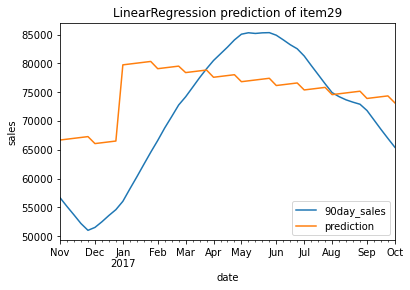

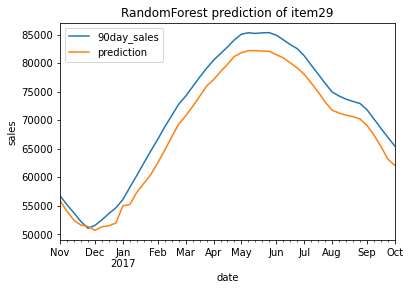

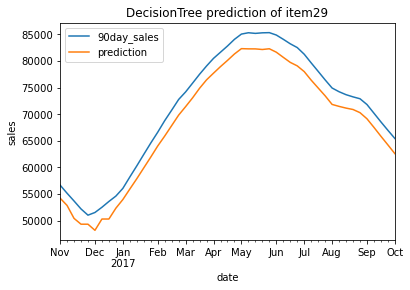

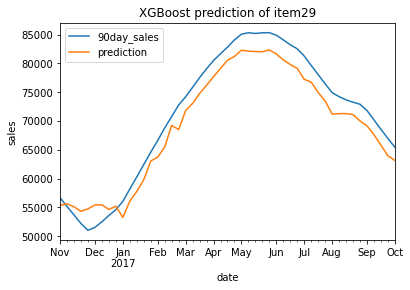

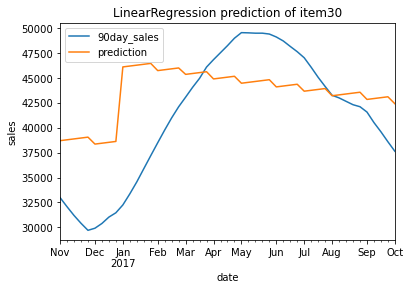

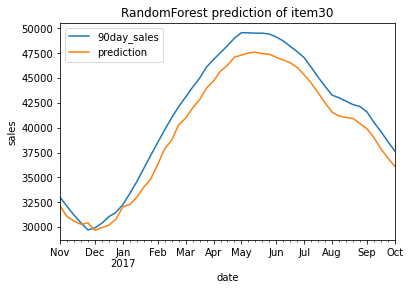

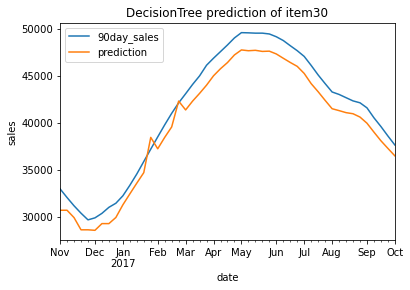

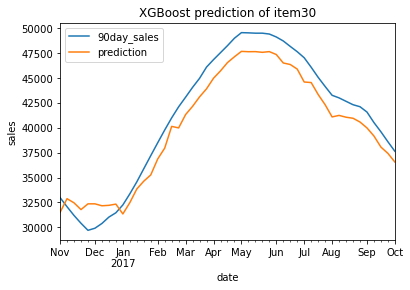

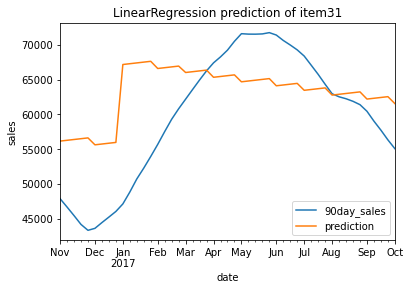

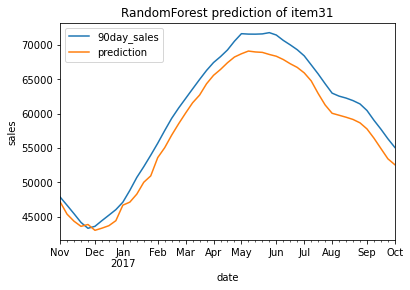

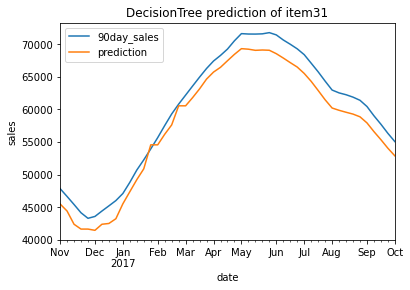

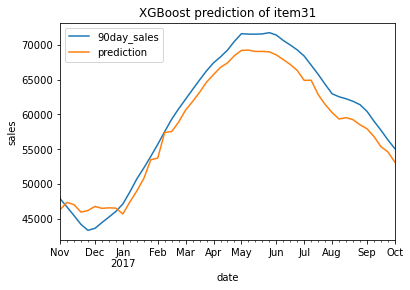

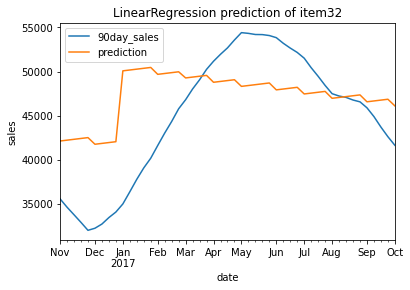

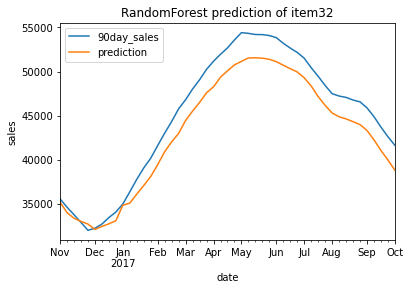

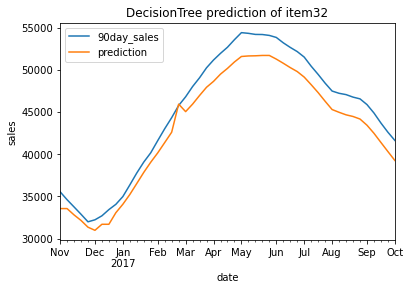

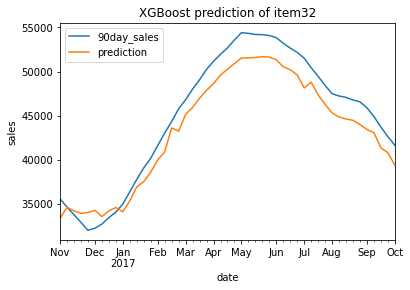

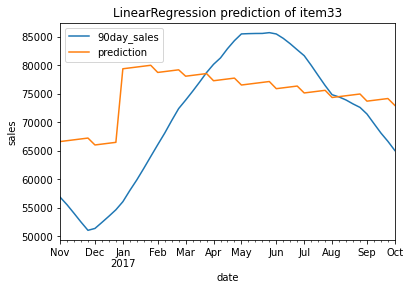

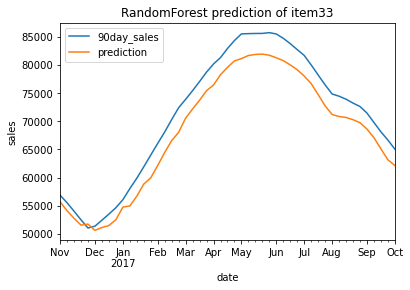

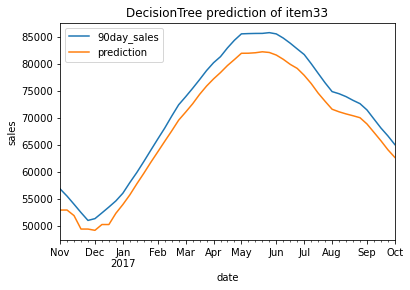

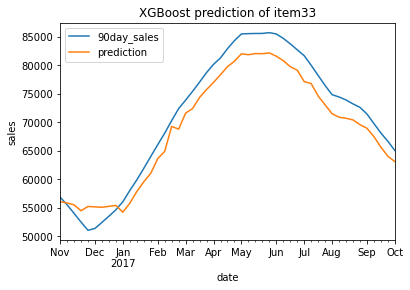

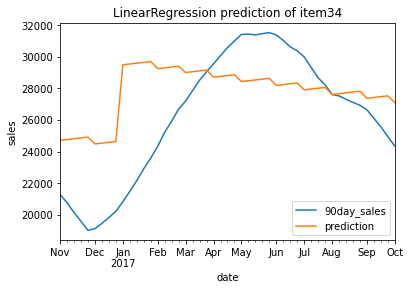

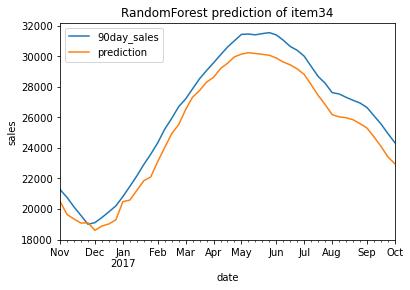

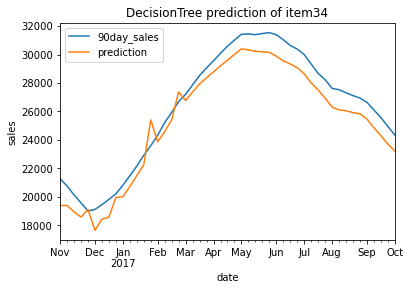

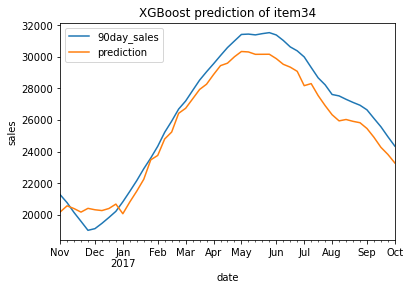

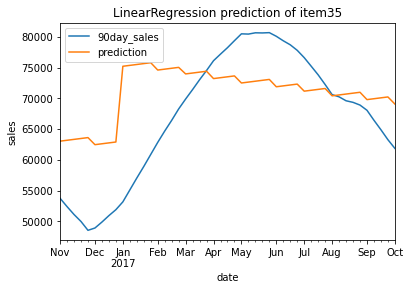

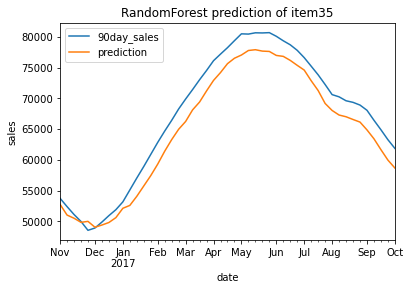

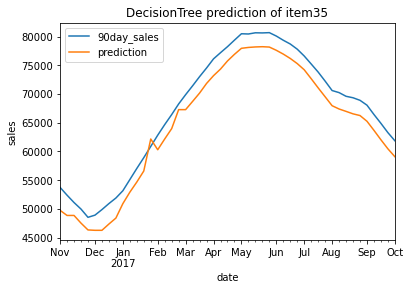

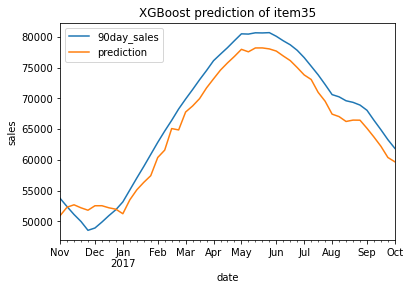

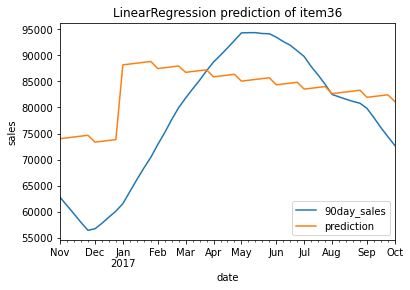

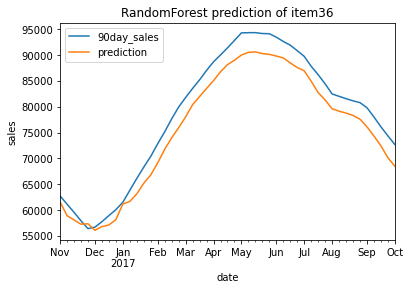

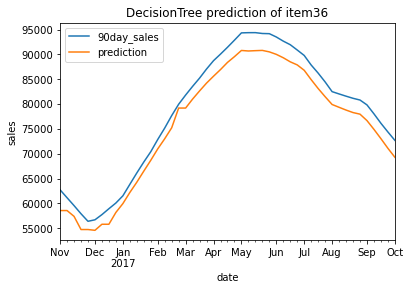

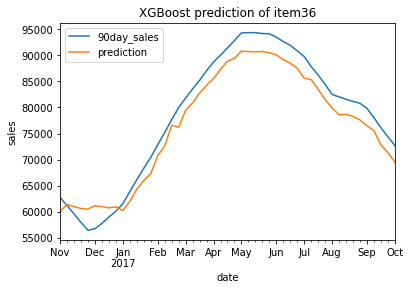

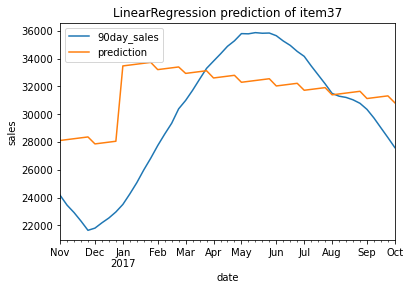

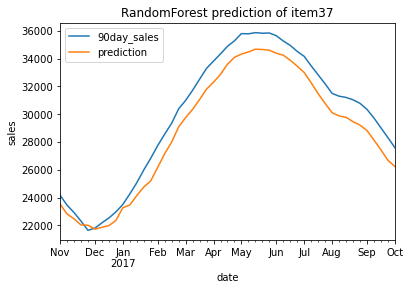

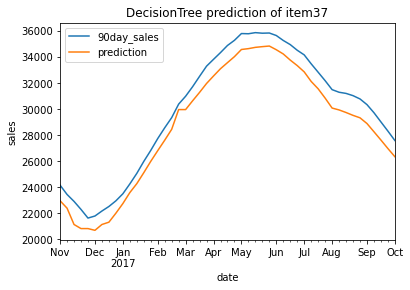

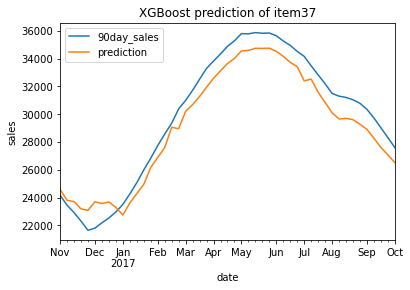

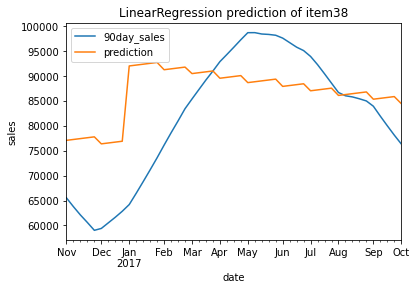

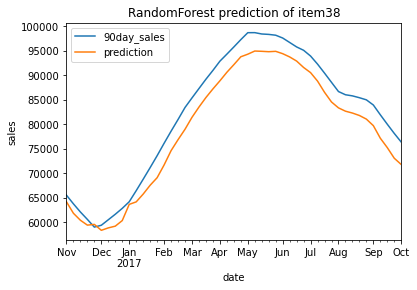

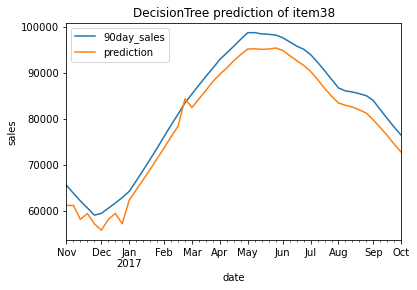

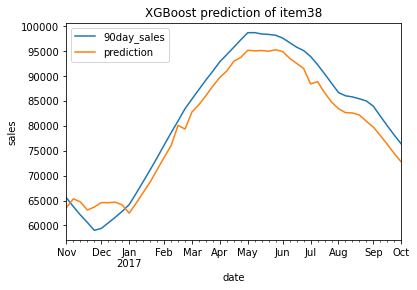

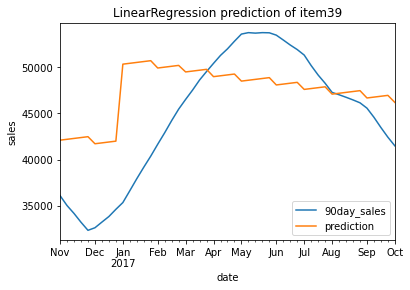

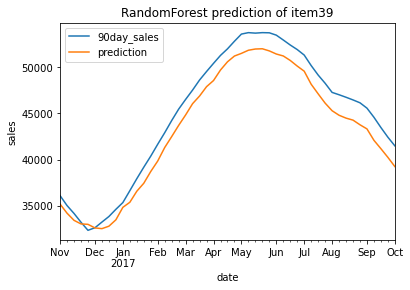

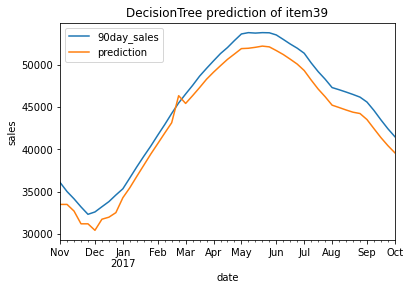

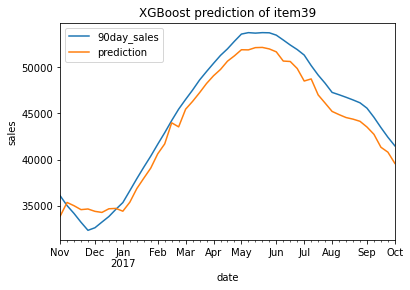

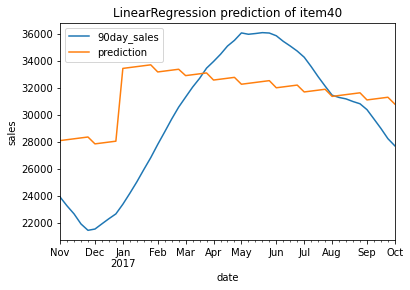

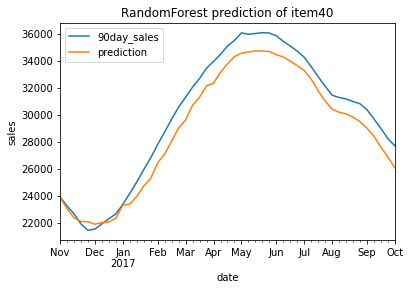

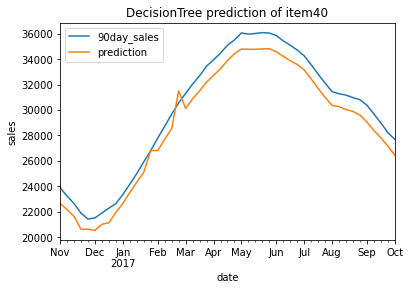

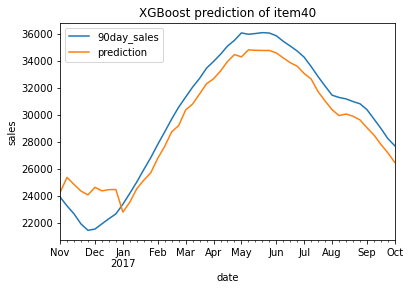

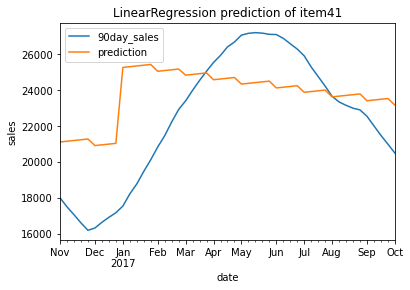

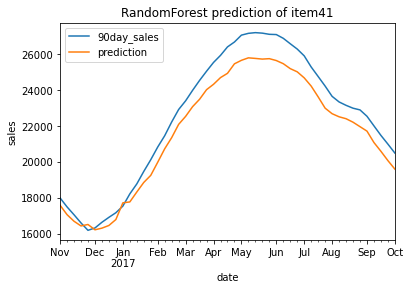

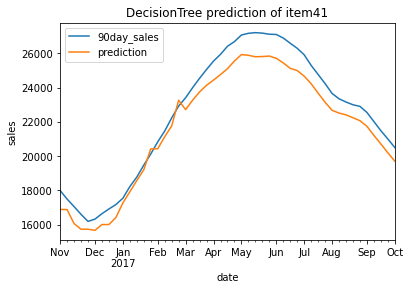

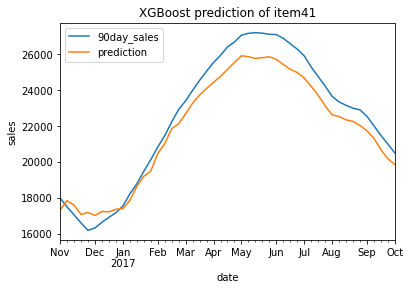

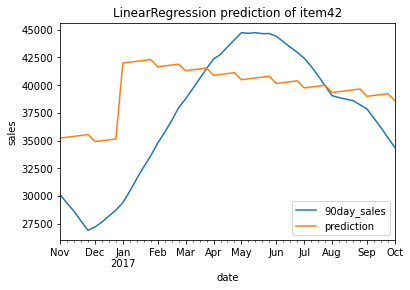

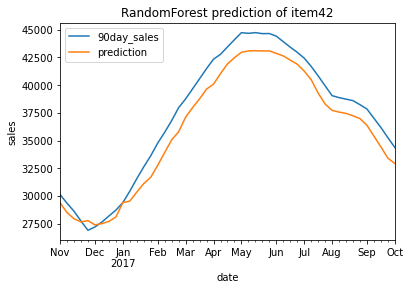

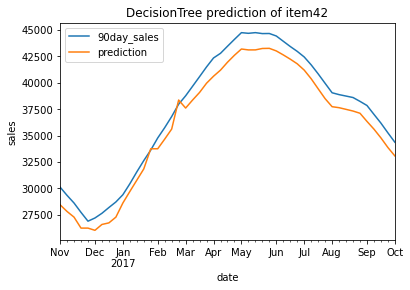

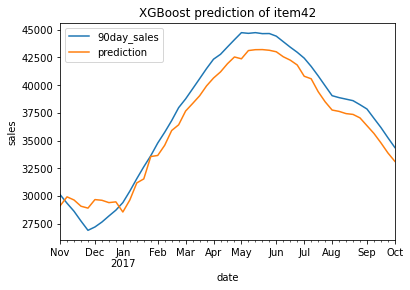

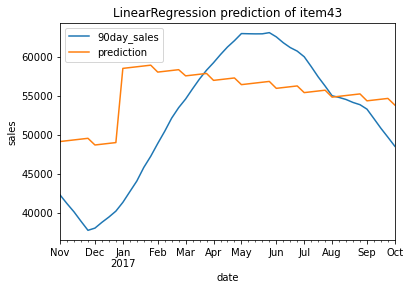

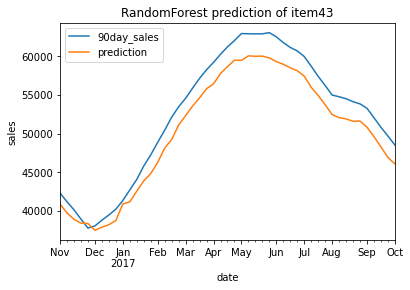

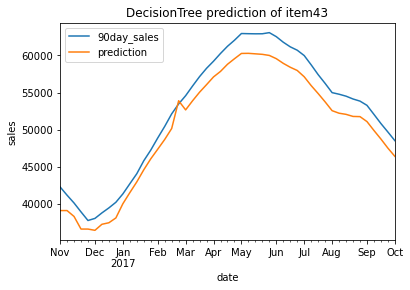

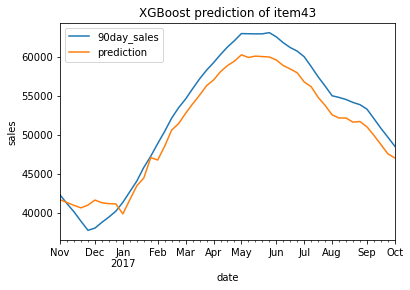

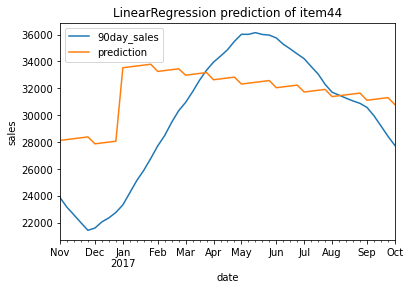

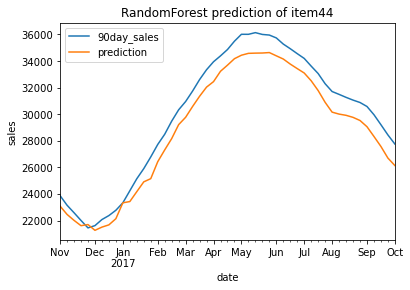

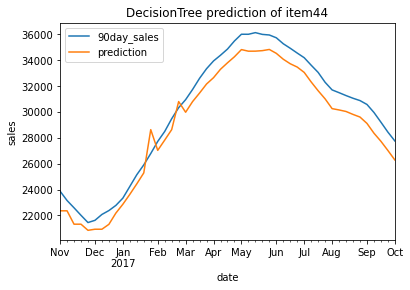

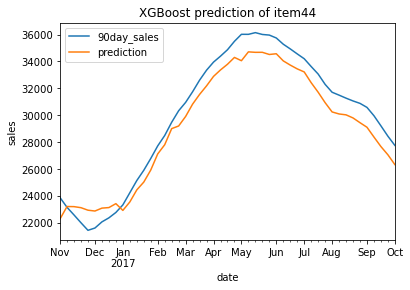

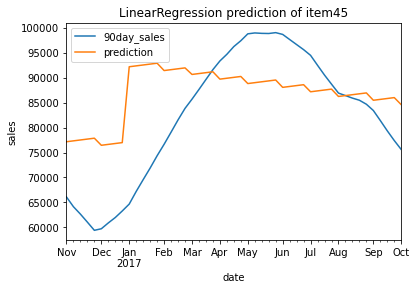

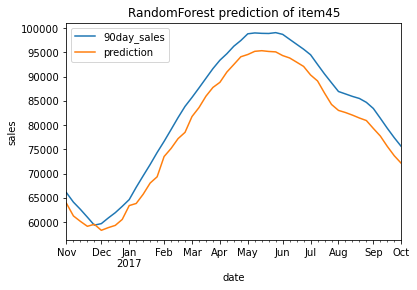

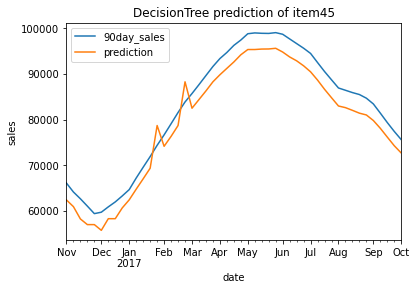

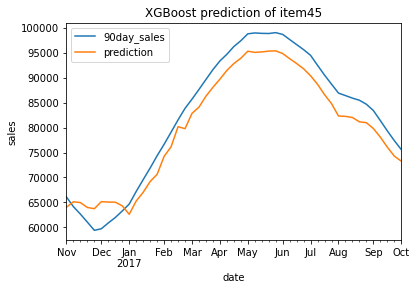

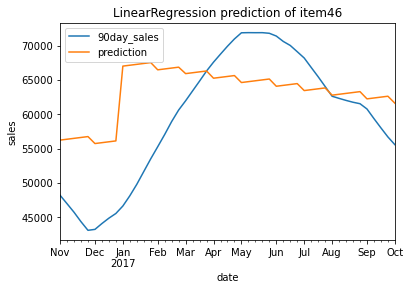

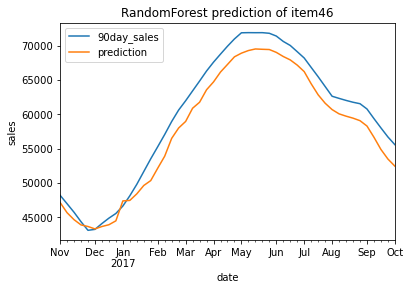

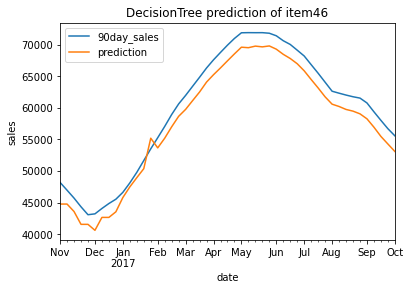

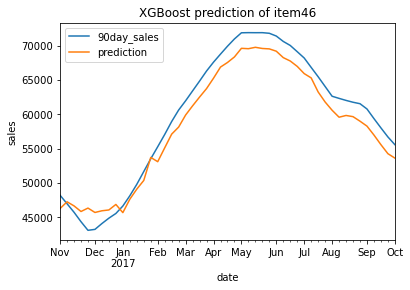

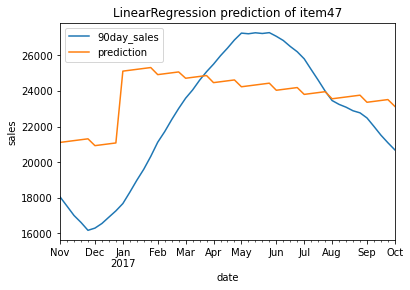

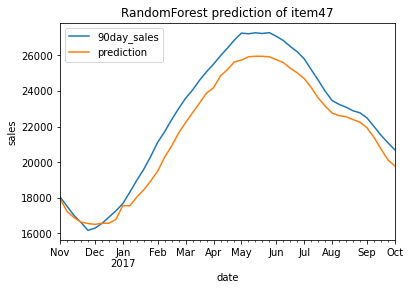

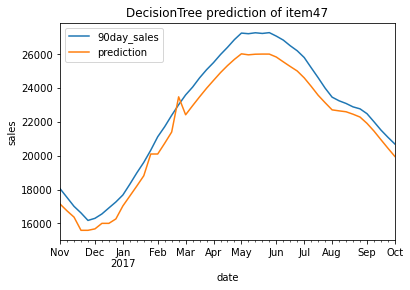

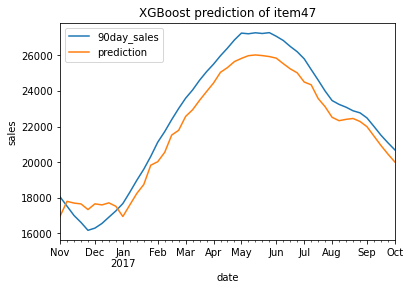

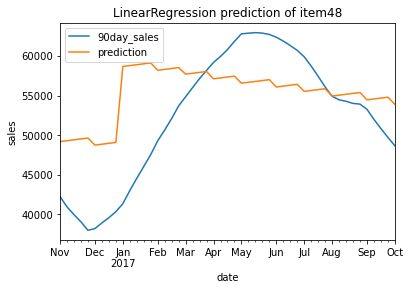

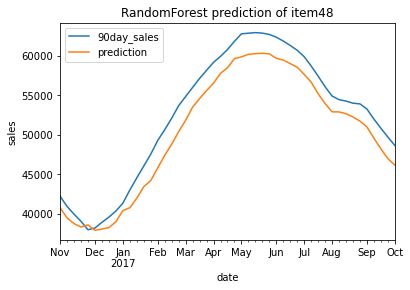

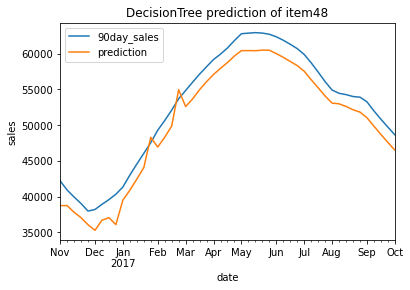

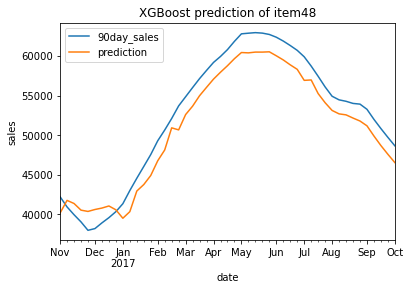

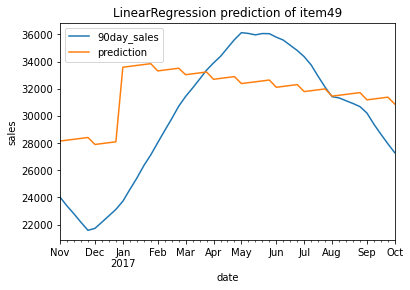

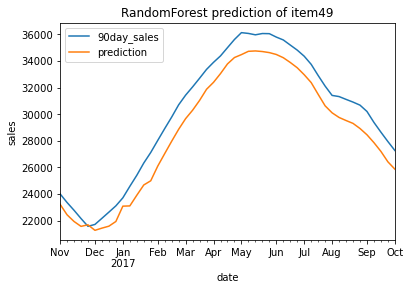

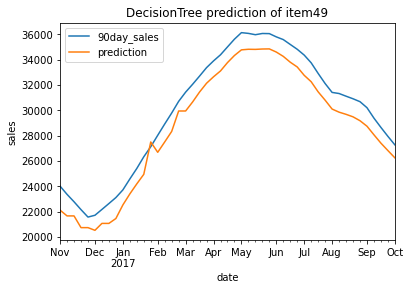

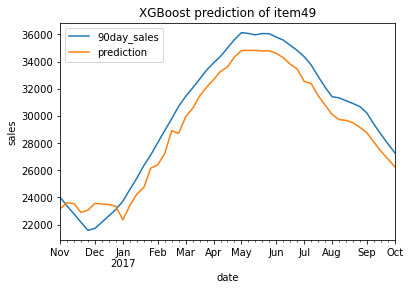

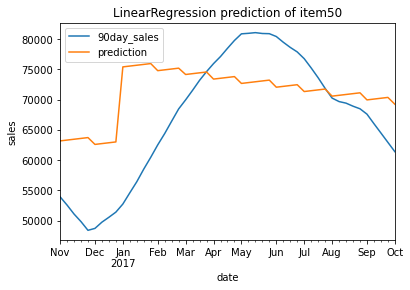

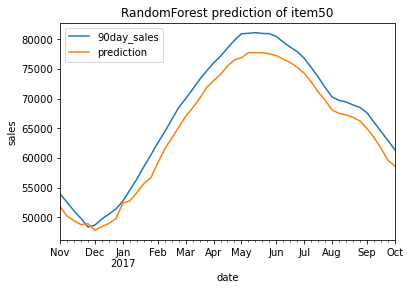

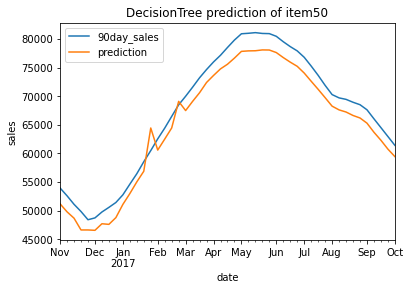

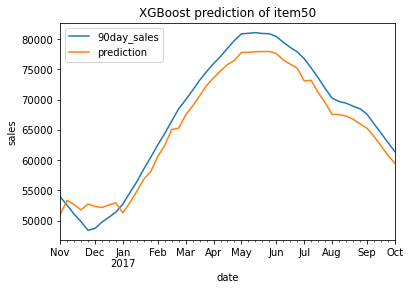

In [32]:
for i in range(1,51):
    df_item=d2[d2['item']==i]
    df_item['90day_sales']=df_item['sales'].rolling(90).sum()
    df_item=df_item.shift(-89)
    df_item=df_item.iloc[::7]
    df_item.drop(['item','sales'],axis=1,inplace=True)
    df_item# it gives information about next 90days sales data of item.
    
    df_item.reset_index(inplace=True)
    df_item['day']=df_item['date'].dt.day
    df_item['week']=df_item['date'].dt.week
    df_item['year']=df_item['date'].dt.year
    df_item.dropna(inplace=True)
    df_item.set_index('date',inplace=True)
    
    X_train=df_item.drop(['90day_sales'],axis=1).iloc[:200]
    X_test=df_item.drop(['90day_sales'],axis=1).iloc[200:]

    Y_train=df_item['90day_sales'].iloc[:200]
    Y_test=df_item['90day_sales'].iloc[200:]
    
    predict_plot(LinearRegression(),title='LinearRegression prediction of item'+str(i))
    predict_plot(RandomForestRegressor(),title='RandomForest prediction of item'+str(i))
    predict_plot(DecisionTreeRegressor(),title='DecisionTree prediction of item'+str(i))
    import xgboost as xgb
    xgb=xgb.XGBRegressor()
    predict_plot(xgb,title='XGBoost prediction of item'+str(i))
    
    
    k=r2.index(max(r2))
    print("The best r2_score for item"+str(i)+" achieved using",models[k],'and score is',max(r2))
    r2=[]
    best.append(l[k])
    l=[]
    
    

In [33]:
len(best)

50

In [34]:
j=int(input('enter item number:'))
d=input('enter date in YYYY-MM-DD format:')
d=datetime.fromisoformat(d).date()
p=[d.day,d.isocalendar()[1],d.year]
p=np.array(p).reshape((1,-1))
print('The predicted next 90day sales for item '+str(j)+' are',best[j-1].predict(p))

enter item number:1
enter date in YYYY-MM-DD format:2017-05-05
The predicted next 90day sales for item 1 are [26122.213]
